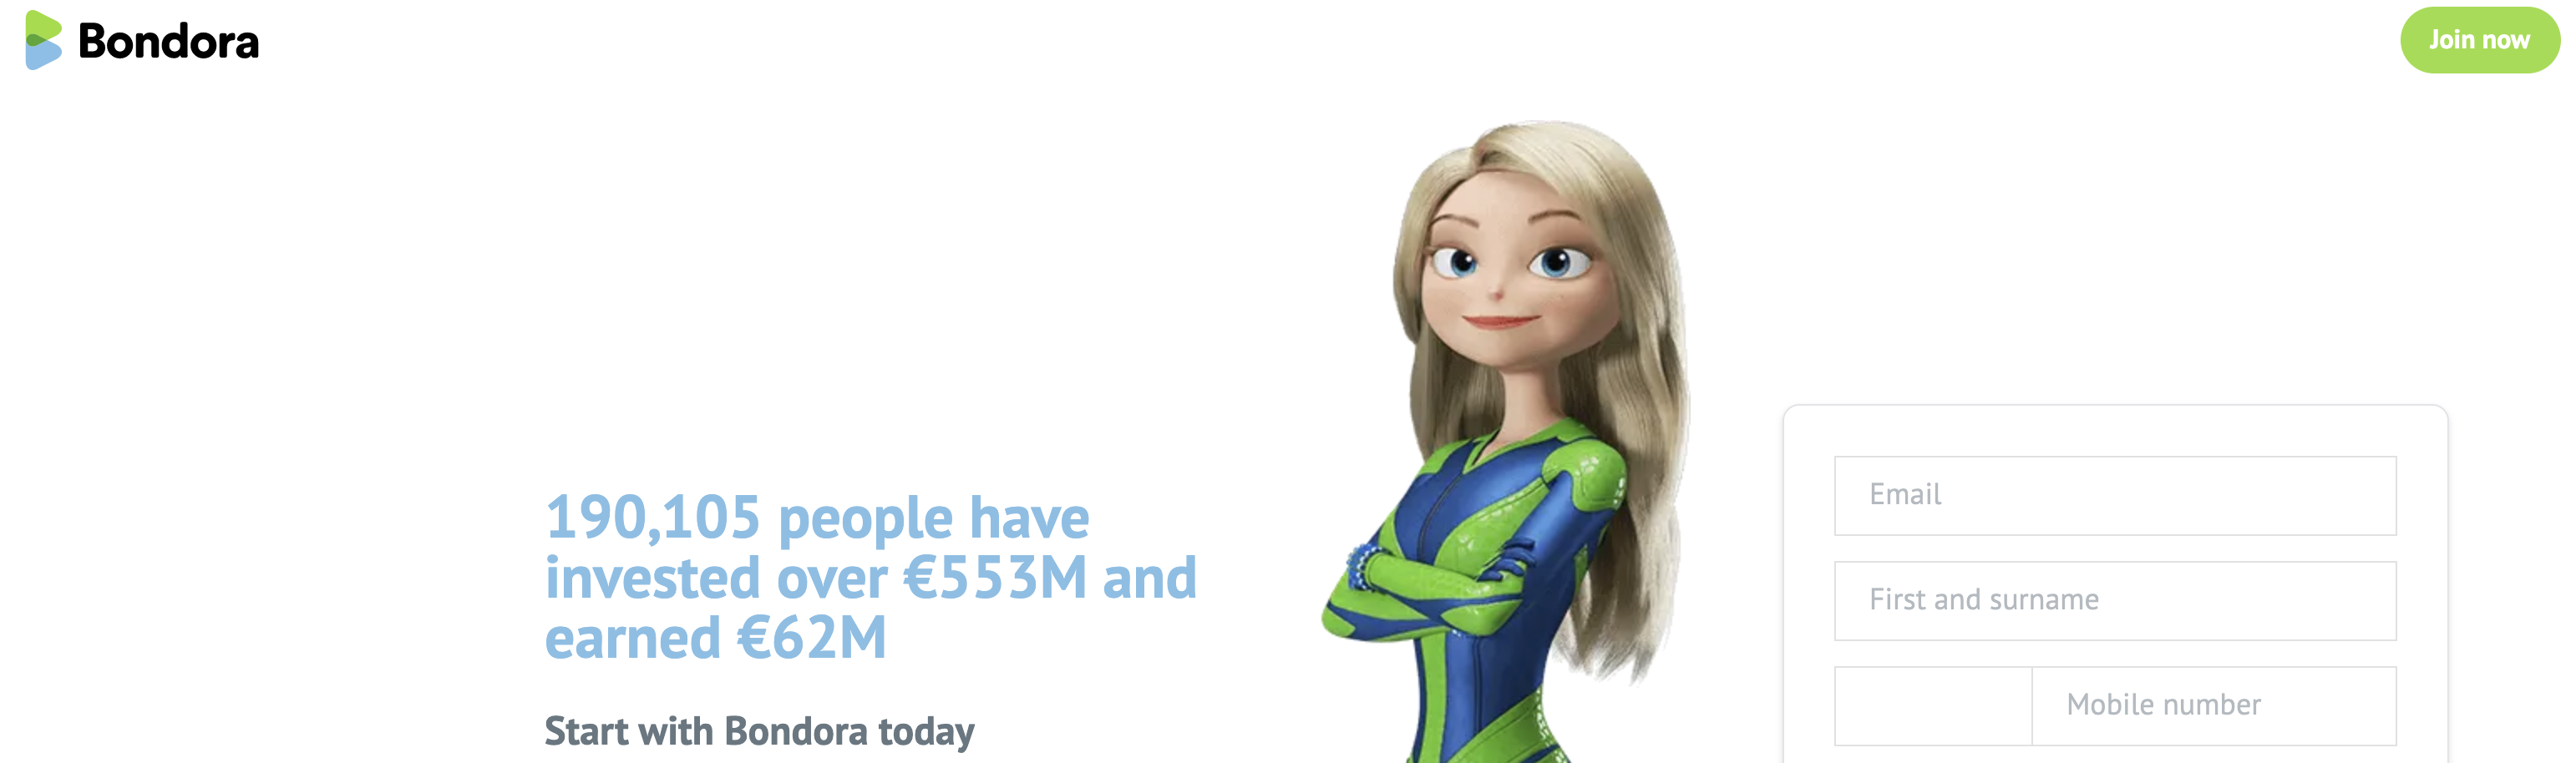

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Summary-View-of-Data" data-toc-modified-id="Summary-View-of-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary View of Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Target-Variable-Analysis" data-toc-modified-id="Target-Variable-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Target Variable Analysis</a></span></li><li><span><a href="#Explanatory-Variable-Analysis" data-toc-modified-id="Explanatory-Variable-Analysis-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Explanatory Variable Analysis</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Run-a-logistic-regression-model-using-cross-validation" data-toc-modified-id="Run-a-logistic-regression-model-using-cross-validation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Run a logistic regression model using cross validation</a></span></li><li><span><a href="#K-Nearest-Neighbours-(KNN)" data-toc-modified-id="K-Nearest-Neighbours-(KNN)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-Nearest Neighbours (KNN)</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Bagging-Classifier" data-toc-modified-id="Bagging-Classifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Bagging Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#ADA-Boost:-Decision-Tree" data-toc-modified-id="ADA-Boost:-Decision-Tree-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>ADA Boost: Decision Tree</a></span></li><li><span><a href="#ADA-Boost:-Elastic-Net" data-toc-modified-id="ADA-Boost:-Elastic-Net-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ADA Boost: Elastic Net</a></span></li><li><span><a href="#ADA-Boost-Grid-Search" data-toc-modified-id="ADA-Boost-Grid-Search-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>ADA Boost Grid Search</a></span></li></ul></li></ul></div>

- Kaggle Dataset from: https://www.kaggle.com/sid321axn/bondora-peer-to-peer-lending-loan-data/activity
- Description of columns: https://www.bondora.com/en/public-reports

# Prediction of default rates for the loan book of peer-2-peer lending platform Bondora

## Configuration

In [1]:
# Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
sns.set_theme()
%config InlineBackend.figure_format = 'retina' # gives higher resolution for retina screens
%matplotlib inline

# Dislay Options
# Display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [2]:
# Reading CSV file:
csv_file = "/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/data/raw/LoanData_Bondora 2.csv"
df = pd.read_csv(csv_file, sep=',',low_memory=False) # note in this example we are setting the index col equal to one of the columns in data

# Save original df
original_df = df.copy()

## Exploratory Data Analysis

### Summary View of Data

In [3]:
# Drop any rows that has only null values
df = df.dropna(how='all')
df.shape

# Initial look at the data
display('Data Frame Shape:',df.shape)
display(df.head())
display(df.describe(include ='all'))

print('Percentage of values that are null:')
display(round(df.isnull().mean()*100,2))
df.info()



'Data Frame Shape:'

(179235, 112)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,2016-03-17 12:39:22,2016-03-23,2020-06-26,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,NaN,1.0,EE,2125.0,2125.0,20.97,60,62.05,NaN,NaN,2,4.0,2.0,0,6.0,MoreThan5Years,NaN,15To25Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,12,True,630.22,1251.98,2021-06-16,552.0,2020-01-14,630.0,2019-10-28,0.068512,0.58,0.141145,0.122216,2020-01-14,1155.84,1251.98,77.68,1251.98,64.07,96.14,0.0,2.0,2020-03-03 09:27:48.493000000,2.0,C,NaN,NaN,NaN,NaN,C,Late,False,180+,180+,NaN,NaN,NaN,1000.0,969.16,1187.91,0.00,0.00,1155.84,433.60,1.0,500.0,590.95,0.0,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,51.73,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,2015-06-24 12:36:16,2015-06-25,NaN,2015-08-17,2020-07-17,2020-07-17,11,5,1.0,1,50,NaN,1.0,EE,3000.0,3000.0,17.12,60,84.75,NaN,NaN,3,5.0,2.0,0,5.0,MoreThan5Years,NaN,MoreThan25Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,17,True,1333.51,3000.00,2019-06-19,1918.0,2016-04-18,1979.0,2016-02-17,0.030799,0.65,0.140436,0.036449,2016-06-02,2436.41,2658.82,1078.96,2730.84,2370.77,294.43,0.0,2.0,2019-08-01 14:18:33,1.0,B,NaN,NaN,0.030799,B,B,Late,False,180+,180+,NaN,NaN,NaN,1000.0,563.59,360.07,0.00,0.00,2436.41,2291.82,1.0,1800.0,445.26,3000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,2016-01-07 15:37:16,2016-01-19,2019-10-24,2016-02-22,2021-01-20,2021-01-20,22,3,4.0,1,44,NaN,0.0,EE,10630.0,9100.0,13.67,60,268.57,NaN,NaN,3,4.0,4.0,1,5.0,UpTo3Years,NaN,MoreThan25Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,20,True,3348.50,9100.00,2019-10-23,1368.0,2017-10-20,1428.0,2017-08-21,0.023177,0.58,0.113484,0.041344,2017-12-06,0.00,6456.37,1537.37,6723.01,501

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
count,179235,179235,1.792350e+05,179235,179235,179235.000000,179235.000000,179235.000000,179235,179235,179235,179235,102996,179235,179235,179235,179235.000000,179235.000000,179185.000000,179235.000000,179235.000000,0.0,179190.000000,179235,179235.000000,179235.000000,179235.000000,179235.000000,172545.000000,0.0,0.0,179235.000000,179185.000000,179185.000000,35600,179033.000000,177629,0.0,36522,179144.000000,177578.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,1.792350e+05,179235.000000,1.792350e+05,179235.000000,179185.000000,179185.000000,179235.000000,179235,54464.000000,177261.000000,172510,76224.000000,76224,82268.000000,82268,176596.000000,176596.000000,176596.000000,176596.000000,71416,164392.000000,71415.000000,71415.000000,71414.000000,71414.000000,71415.000000,71415.000000,111940.000000,118747,176596.000000,176502,4569.000000,4569,12924.000000,12924,25143,179235,179235,74984,126906,148931,12219,41828,105097.000000,179235.000000,179235.000000,76150.000000,76150.000000,179235.000000,174003.000000,179226.000000,179226.000000,116849.000000,58885.000000,179226.000000,41885,41885,65621,112291.000000,112291.000000,63044,76150.000000,76150.000000,82268
unique,1,179235,NaN,178456,178462,NaN,NaN,NaN,85087,2,178690,4041,4670,2477,3442,3937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,9,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3422,NaN,1881,NaN,1905,NaN,NaN,NaN,NaN,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64708,NaN,8,NaN,8,NaN,8,8,3,2,9,9,11,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1338,1659,30,NaN,NaN,1734,NaN,NaN,9
top,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,NaN,2020-02-10 15:17:43,2021-04-26 10:26:37,NaN,NaN,NaN,bevp,True,2021-04-27 10:25:56,2019-10-15,2026-04-27,2019-11-04,2024-11-04,2026-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,MoreThan5Years,NaN,15To25Years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Percentage of values that are null:


ReportAsOfEOD                               0.00
LoanId                                      0.00
LoanNumber                                  0.00
ListedOnUTC                                 0.00
BiddingStartedOn                            0.00
BidsPortfolioManager                        0.00
BidsApi                                     0.00
BidsManual                                  0.00
UserName                                    0.00
NewCreditCustomer                           0.00
LoanApplicationStartedDate                  0.00
LoanDate                                    0.00
ContractEndDate                            42.54
FirstPaymentDate                            0.00
MaturityDate_Original                       0.00
MaturityDate_Last                           0.00
ApplicationSignedHour                       0.00
ApplicationSignedWeekday                    0.00
VerificationType                            0.03
LanguageCode                                0.00
Age                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179235 entries, 0 to 179234
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(62), int64(12), object(35)
memory usage: 149.6+ MB


### Data Cleaning

In [4]:
# Remove all columns where more than 75% null values
print('Removing columns where more than 75% of values are null:')
for i in df.columns:
    if df[i].isnull().mean() > 0.75:
        count = round(df[i].isnull().mean()*100,4)
        print('Dropped', i, '-', count, '% were null','\n')
        df.drop(i, axis=1, inplace=True)
        
print('Percentage of values that are null:')
display(round(df.isnull().mean()*100),2)

Removing columns where more than 75% of values are null:
Dropped DateOfBirth - 100.0 % were null 

Dropped County - 100.0 % were null 

Dropped City - 100.0 % were null 

Dropped NrOfDependants - 80.1378 % were null 

Dropped EmploymentPosition - 100.0 % were null 

Dropped WorkExperience - 79.6234 % were null 

Dropped EL_V0 - 97.4508 % were null 

Dropped Rating_V0 - 97.4508 % were null 

Dropped EL_V1 - 92.7894 % were null 

Dropped Rating_V1 - 92.7894 % were null 

Dropped Rating_V2 - 85.972 % were null 

Dropped CreditScoreEsEquifaxRisk - 93.1827 % were null 

Dropped CreditScoreFiAsiakasTietoRiskGrade - 76.663 % were null 

Dropped GracePeriodStart - 76.6312 % were null 

Dropped GracePeriodEnd - 76.6312 % were null 

Percentage of values that are null:


ReportAsOfEOD                              0.0
LoanId                                     0.0
LoanNumber                                 0.0
ListedOnUTC                                0.0
BiddingStartedOn                           0.0
BidsPortfolioManager                       0.0
BidsApi                                    0.0
BidsManual                                 0.0
UserName                                   0.0
NewCreditCustomer                          0.0
LoanApplicationStartedDate                 0.0
LoanDate                                   0.0
ContractEndDate                           43.0
FirstPaymentDate                           0.0
MaturityDate_Original                      0.0
MaturityDate_Last                          0.0
ApplicationSignedHour                      0.0
ApplicationSignedWeekday                   0.0
VerificationType                           0.0
LanguageCode                               0.0
Age                                        0.0
Gender       

2

In [5]:
# For columns where less than 5% are nulls, try to replace nulls with column mean
failed = []
for i in df.columns:
    try:
        if (df[i].isnull().mean() < 0.05) & (df[i].isnull().mean() > 0.00):
            count = round(df[i].isnull().mean(),4)*100
            
            df.loc[df[i].isnull(), i] = df[i].mean()
            print('Updated', i, count,'% were previously null \n')
    except:
        failed.append(i)
        print('Failed to update:',i, 'of which', count,'% are still null \n')
        pass
    
print('Percentage of values that are null:')
display(round(df.isnull().mean()*100),4)
print('Columns that failed:', failed)

Updated VerificationType 0.03 % were previously null 

Updated Gender 0.03 % were previously null 

Updated MonthlyPayment 3.73 % were previously null 

Updated Education 0.03 % were previously null 

Updated MaritalStatus 0.03 % were previously null 

Updated EmploymentStatus 0.11 % were previously null 

Failed to update: EmploymentDurationCurrentEmployer of which 0.8999999999999999 % are still null 

Updated OccupationArea 0.05 % were previously null 

Updated HomeOwnershipType 0.9199999999999999 % were previously null 

Updated DebtToIncome 0.03 % were previously null 

Updated FreeCash 0.03 % were previously null 

Updated PlannedInterestTillDate 1.0999999999999999 % were previously null 

Failed to update: LastPaymentOn of which 3.75 % are still null 

Updated ExpectedLoss 1.47 % were previously null 

Updated LossGivenDefault 1.47 % were previously null 

Updated ExpectedReturn 1.47 % were previously null 

Updated ProbabilityOfDefault 1.47 % were previously null 

Updated Model

ReportAsOfEOD                              0.0
LoanId                                     0.0
LoanNumber                                 0.0
ListedOnUTC                                0.0
BiddingStartedOn                           0.0
BidsPortfolioManager                       0.0
BidsApi                                    0.0
BidsManual                                 0.0
UserName                                   0.0
NewCreditCustomer                          0.0
LoanApplicationStartedDate                 0.0
LoanDate                                   0.0
ContractEndDate                           43.0
FirstPaymentDate                           0.0
MaturityDate_Original                      0.0
MaturityDate_Last                          0.0
ApplicationSignedHour                      0.0
ApplicationSignedWeekday                   0.0
VerificationType                           0.0
LanguageCode                               0.0
Age                                        0.0
Gender       

4

Columns that failed: ['EmploymentDurationCurrentEmployer', 'LastPaymentOn', 'Rating']


In [6]:
# Update date columns to date format and create list of date columns
date_indicators = ['date','Date','DATE']
date_columns = []
for i in df.columns:
    for j in date_indicators:
        if j in i:
            df[i] = pd.to_datetime(df[i])
            date_columns.append(i)
            print('Changed format to date for:', i)

Changed format to date for: LoanApplicationStartedDate
Changed format to date for: LoanDate
Changed format to date for: ContractEndDate
Changed format to date for: FirstPaymentDate
Changed format to date for: MaturityDate_Original
Changed format to date for: MaturityDate_Last
Changed format to date for: PlannedPrincipalTillDate
Changed format to date for: PlannedInterestTillDate
Changed format to date for: DefaultDate
Changed format to date for: NextPaymentDate


In [7]:
# Change to date formate other columns that should be date and weren't previosuly captured
additional_date_columns = ['ReportAsOfEOD','ListedOnUTC','BiddingStartedOn','LastPaymentOn','DebtOccuredOn','StageActiveSince','ReScheduledOn']


In [8]:
for i in additional_date_columns:
    df[i] = pd.to_datetime(df[i])
    date_columns.append(i)
    print('Changed format to date for:', i)

Changed format to date for: ReportAsOfEOD
Changed format to date for: ListedOnUTC
Changed format to date for: BiddingStartedOn
Changed format to date for: LastPaymentOn
Changed format to date for: DebtOccuredOn
Changed format to date for: StageActiveSince
Changed format to date for: ReScheduledOn


In [9]:
# Check all dates are in date format
df[date_columns].dtypes

LoanApplicationStartedDate    datetime64[ns]
LoanDate                      datetime64[ns]
ContractEndDate               datetime64[ns]
FirstPaymentDate              datetime64[ns]
MaturityDate_Original         datetime64[ns]
MaturityDate_Last             datetime64[ns]
PlannedPrincipalTillDate      datetime64[ns]
PlannedInterestTillDate       datetime64[ns]
DefaultDate                   datetime64[ns]
NextPaymentDate               datetime64[ns]
ReportAsOfEOD                 datetime64[ns]
ListedOnUTC                   datetime64[ns]
BiddingStartedOn              datetime64[ns]
LastPaymentOn                 datetime64[ns]
DebtOccuredOn                 datetime64[ns]
StageActiveSince              datetime64[ns]
ReScheduledOn                 datetime64[ns]
dtype: object

In [10]:
# View columns that are type object
df.select_dtypes('object').columns.to_list()

['LoanId',
 'UserName',
 'Country',
 'EmploymentDurationCurrentEmployer',
 'DebtOccuredOnForSecondary',
 'Rating',
 'Status',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEsMicroL',
 'ActiveLateLastPaymentCategory']

In [11]:
# filter out loans that are current
df1 = df # make copy for using later
df = df[df.Status != 'Current']

In [12]:
# filter out loans after 2017
df = df[df.LoanDate.dt.year <= 2017]

In [13]:
# filter out columns with dates
columns_keep = [i for i in df.columns if i not in date_columns]
df = df[columns_keep]

In [14]:
# View final columns that have null values
(df.isnull().mean()*100)[df.isnull().sum()!=0]

EmploymentDurationCurrentEmployer     1.901593
CurrentDebtDaysPrimary               46.066080
CurrentDebtDaysSecondary             42.982475
DebtOccuredOnForSecondary            42.982475
PrincipalOverdueBySchedule           31.482162
PlannedPrincipalPostDefault          40.622772
PlannedInterestPostDefault           40.622772
EAD1                                 40.622772
EAD2                                 40.622772
PrincipalRecovery                    40.622772
InterestRecovery                     40.622772
RecoveryStage                        44.400026
Rating                                5.903581
ActiveLateCategory                   46.130907
WorseLateCategory                    19.934309
CreditScoreEsMicroL                  60.539793
CreditScoreEeMini                    53.477970
NextPaymentNr                        83.101757
NrOfScheduledPayments                83.101757
ActiveLateLastPaymentCategory        42.982475
dtype: float64

In [15]:
# Set Nan values in employment duration to 'Other'
df.EmploymentDurationCurrentEmployer.value_counts(dropna=False)

MoreThan5Years    17421
UpTo1Year          8528
UpTo5Years         5526
UpTo2Years         5343
UpTo3Years         4387
UpTo4Years         2996
NaN                 880
TrialPeriod         574
Retiree             370
Other               252
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [16]:
df.EmploymentDurationCurrentEmployer[df.EmploymentDurationCurrentEmployer.isnull()] = 'Other'
df.EmploymentDurationCurrentEmployer.value_counts(dropna=False)

MoreThan5Years    17421
UpTo1Year          8528
UpTo5Years         5526
UpTo2Years         5343
UpTo3Years         4387
UpTo4Years         2996
Other              1132
TrialPeriod         574
Retiree             370
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [17]:
# Drop the following as indicates loan is late or other reason
df.drop(['CurrentDebtDaysPrimary','CurrentDebtDaysSecondary','DebtOccuredOnForSecondary','PrincipalOverdueBySchedule','PlannedPrincipalPostDefault', 'PlannedInterestPostDefault','EAD1', 'EAD2','PrincipalRecovery','InterestRecovery', 'RecoveryStage','ActiveLateCategory','WorseLateCategory','ActiveLateLastPaymentCategory','NextPaymentNr','NrOfScheduledPayments'], inplace=True, axis=1)              



In [18]:
# View final columns that have null values
(df.isnull().mean()*100)[df.isnull().sum()!=0]

Rating                  5.903581
CreditScoreEsMicroL    60.539793
CreditScoreEeMini      53.477970
dtype: float64

In [19]:
# Not clear why these are Nans. For the time being include as own category
df.Rating.value_counts(dropna=False)

HR     11229
C       7102
D       6949
E       5685
B       4999
F       4171
NaN     2732
A       2099
AA      1311
Name: Rating, dtype: int64

In [20]:
df.loc[df.Rating.isnull(),'Rating'] = 'Other'

In [21]:
# Some credit scores are not available MicroL, mark not available
df.loc[df.CreditScoreEsMicroL.isnull(),'CreditScoreEsMicroL'] = 'not_provided'

In [22]:
# Some credit scores are not available Mini, mark not available
df.loc[df.CreditScoreEeMini.isnull(),'CreditScoreEeMini'] = 'not_provided'

### Target Variable Analysis

Consider which date range to include. The bar chart below shows:
- Percentage of loans repaid decreases as move closer to the present. Older loans have had more time to be repaid.
- Percentage of loans Current increases as move closer to the present. Older loans have been repaid and loans issued more recently are more likely to still be Current.
- Percentage of loans that are Late declines 2009-2012, increases from 213 to 2017, roughly flat in 2018-2019 then declines in 2020-2021. What is going on here? 2020-21 declining because more recent loans have had less time to go sour and therefore become 'Late' (note average loan duration is ~4 years). 2009-2013 low levels of Late explained by the fact there has been more time for these loans to be cleared / repaid. 2014-2019 is therefore the period where loans have had time to mature and a number of loans have reached a normalised Late status of around 0.5%. It can be expected that given time a number of these loans will be repaid and be in line with 2009-2012 where c.0.1% of loans are still Late.


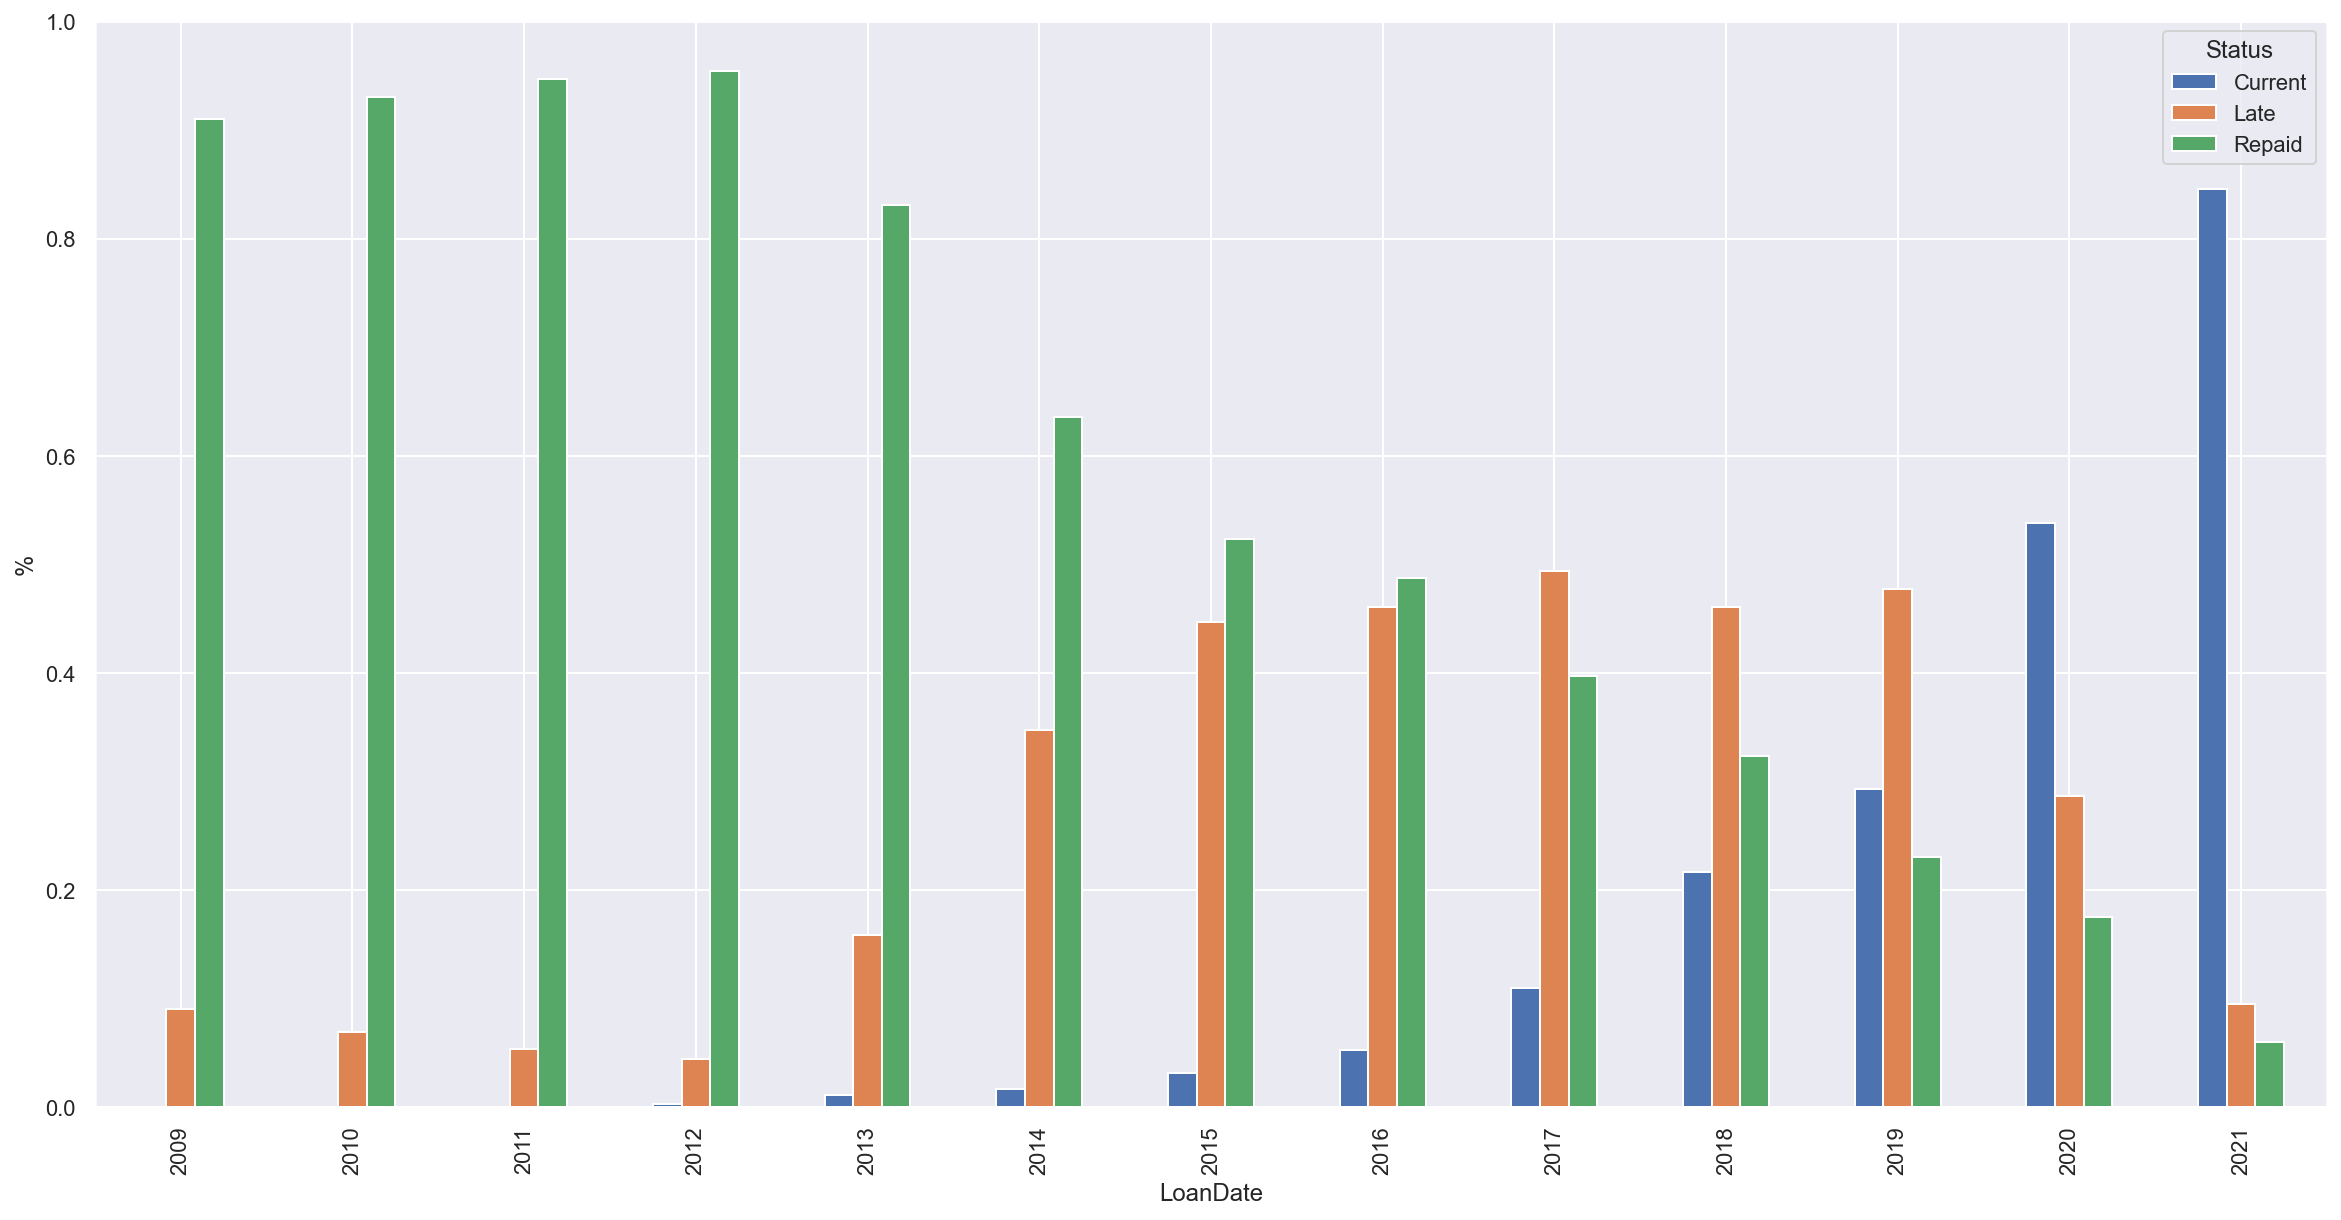

In [23]:
df1['Status'].groupby(df1.LoanDate.dt.year).value_counts(normalize=True).unstack(1).plot(kind='bar', figsize=(20,10), ylabel='%');

For the purposes of this analysis I will include only loans that were issued prior to 2017 taking into account that loans have on average a duration of 4 years. Further a number of key columns such as debt to income are not available from 2018 onwards. Also the high percentage of loans (>10%) that are current for loans issued in 2018-2021 would complicate the analysis. 

### Explanatory Variable Analysis

In [24]:
# Create a column which shows interest as percentage of principal
df["Interest_%"] =  df.Interest / df.Amount * 100

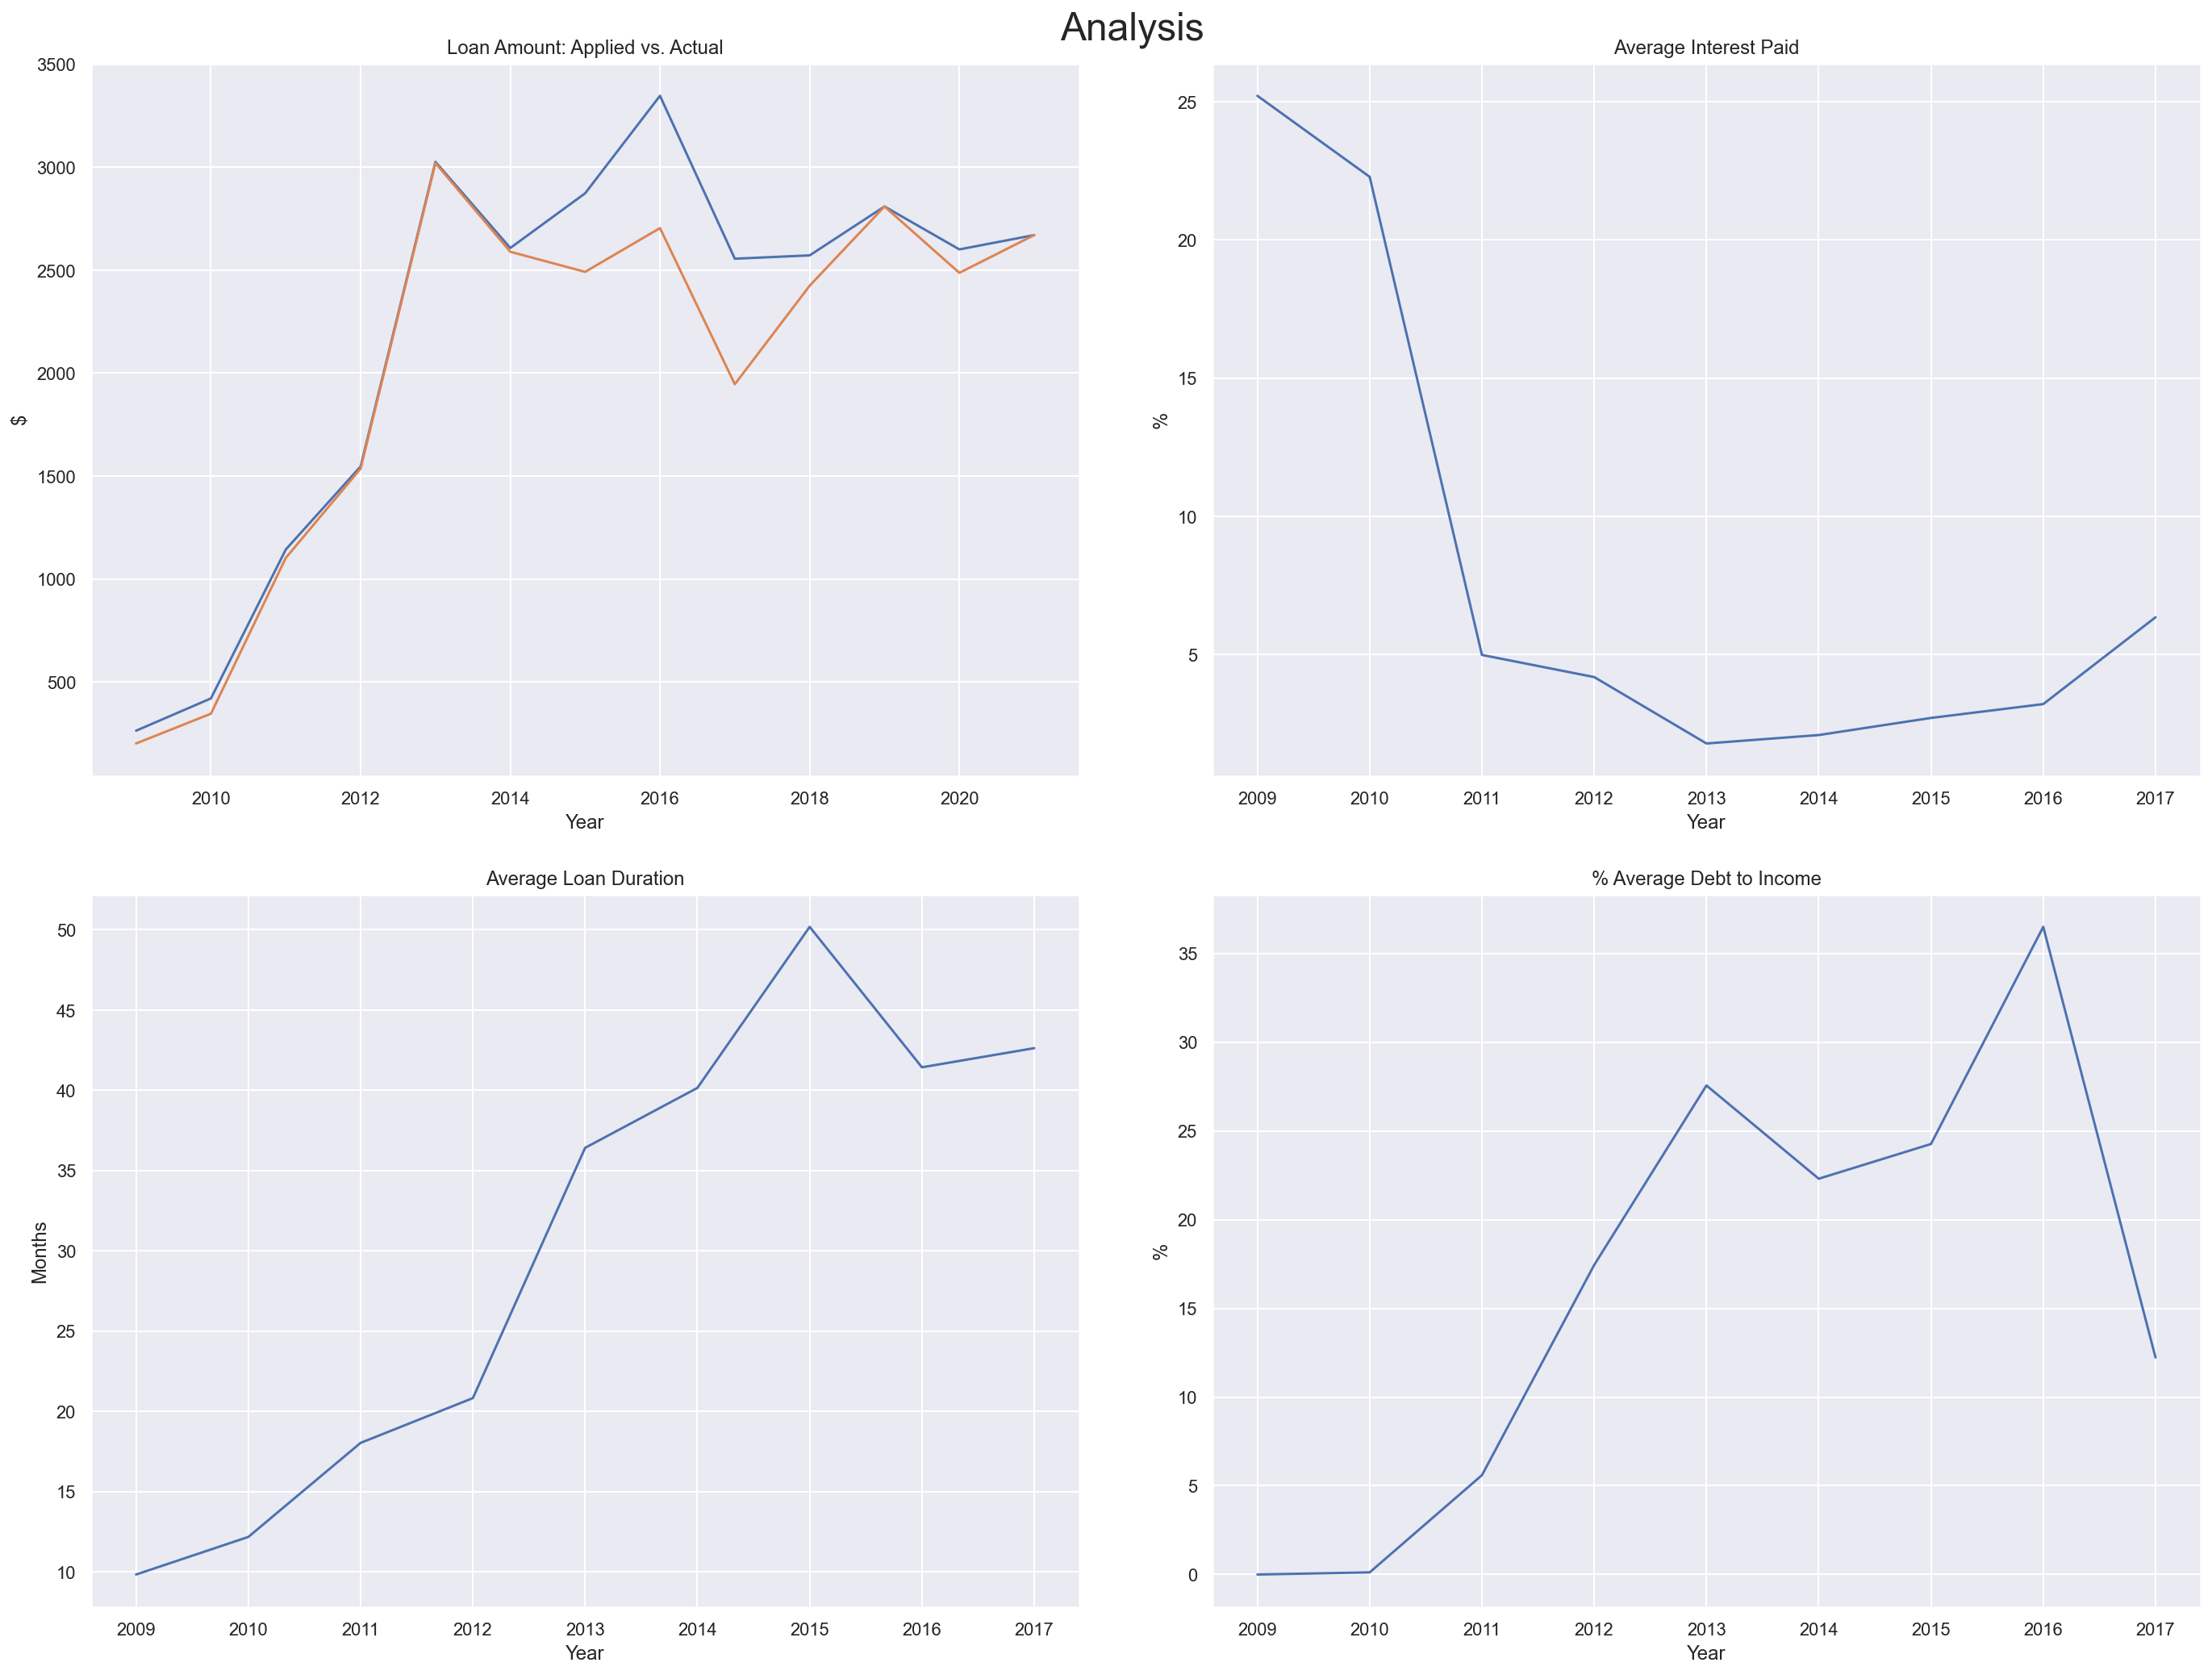

In [25]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(20, 15), )
fig.tight_layout(pad=5,h_pad=5)
fig.suptitle('Analysis', fontsize=24)
ax[0][0].set_title('Loan Amount: Applied vs. Actual')
ax[0][0].set_ylabel('$')
ax[0][0].set_xlabel('Year')
ax[0][0].plot(df1[['AppliedAmount','Amount']].groupby(df1.LoanDate.dt.year).mean())

ax[0][1].set_title('Average Interest Paid')
ax[0][1].set_ylabel('%')
ax[0][1].set_xlabel('Year')
ax[0][1].plot(df[['Interest_%']].groupby(df1.LoanDate.dt.year).mean())

ax[1][0].set_title('Average Loan Duration')
ax[1][0].set_ylabel('Months')
ax[1][0].set_xlabel('Year')
ax[1][0].plot(df[['LoanDuration']].groupby(df1.LoanDate.dt.year).mean())

ax[1][1].set_title('% Average Debt to Income')
ax[1][1].set_ylabel('%')
ax[1][1].set_xlabel('Year')
ax[1][1].plot(df[['DebtToIncome']].groupby(df1.LoanDate.dt.year).mean())


plt.show()

Top Left: indicates that loan approvals declined in the period 2014-2018.
TOP Right: interest paid by the borrower declined sharply in the period 2010-2012. Possibly this reflects the platform becoming more established and greater access to capital for investors.
Bottom Left: average loan duration has increased over the past 10 years.
Bottom Left: debt to income ratios increased in the period 2010-2018. Figures are not provided from 2018 onwards.

## Modelling

In [26]:
# filter data set so that i) only pre 2017 in scope, ii) current and repaid are grouped together (assume all current will be repaid)
# iii) assign X and y

In [27]:
X = df
y = X.pop('Status')

Some of the columns can be removed before modelling as it can be assumed they do not have predictive power: LoadId, LoanNumber, UserName. CreditScoreEeMini is removed due to a high percentage of null values. Finally columns that directly imply that the loan is outstanding or late are removed including PrincipalBalance, InterestAndPenaltyBalanc etc. The ModelVersion column also seemed to have suspiciously high predictive power and has therefore been removed (it may be that loans that are at higher risk of default use a specific model). 

In [28]:
X.ModelVersion

0         2.0
1         1.0
2         2.0
3         1.0
4         2.0
         ... 
179230    1.0
179231    2.0
179232    2.0
179233    1.0
179234    1.0
Name: ModelVersion, Length: 46277, dtype: float64

In [29]:
X.drop(['LoanId','LoanNumber','UserName','CreditScoreEeMini','PrincipalBalance','InterestAndPenaltyBalance','InterestAndPenaltyPaymentsMade','InterestAndPenaltyDebtServicingCost','InterestAndPenaltyWriteOffs','PrincipalPaymentsMade','PrincipalWriteOffs','ModelVersion'],axis=1, inplace=True)

Create dummy variables for columns that are categorical.

In [30]:
dummies = ['NewCreditCustomer','ApplicationSignedHour','ApplicationSignedWeekday','VerificationType','LanguageCode','Gender','Country','UseOfLoan','Education','MaritalStatus','EmploymentStatus','EmploymentDurationCurrentEmployer','OccupationArea','HomeOwnershipType','MonthlyPaymentDay','ActiveScheduleFirstPaymentReached','Rating','Restructured','CreditScoreEsMicroL']
X = pd.get_dummies(X, columns=dummies, drop_first= True)

In [31]:
# Function to return key model scores
def model_score(model,CV_scores):
    Bold = '\033[1m'
    Normal = '\033[0m'
    print(Bold + 'Base line score:' + Normal,
          np.round(y_train.value_counts(normalize=True)[0], 3))
    print(Bold + 'Training Score:' + Normal, np.round(model.score(X_train, y_train),
                                                      3))
    print(Bold + 'Test Score:' + Normal, np.round(model.score(X_test, y_test), 3))
    print(Bold + "Cross-validated training scores:" + Normal,
          np.round(CV_scores, 4))
    print(Bold + "Mean cross-validated training score:" + Normal,
          np.round(CV_scores.mean(), 3), '\n')

Function to generate outputs from model

In [32]:
# Function to return some plots for Logistic Regression
def logist_plots(model, X_train, y_train, X_test, y_test,CV_scores,yes_label,no_label):

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
    from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
    from matplotlib.colors import ListedColormap
    import scikitplot as skplt

    # classification report
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    print('y_train classification report:')
    print(classification_report(y_train, predictions_train))
    print('y_test classification report:')
    print(classification_report(y_test, predictions_test))

    # plot the confusion matrix
    fig, ax = plt.subplots(ncols=2, figsize=(14, 6), sharey=True)
    plot_confusion_matrix(model,
                          X_train,
                          y_train,
                          cmap='Blues',
                          ax=ax[0],xticks_rotation='vertical' )
    plot_confusion_matrix(model,
                          X_test,
                          y_test,
                          cmap='Blues',
                          ax=ax[1],xticks_rotation='vertical')
    
    for a in ax:
        texts = a.texts
        for text in texts:
            text.set_size(20)
    plt.show()

    # ROC  curves:
    print('ROC Curves:')
    fig_rec, ax_rec = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
    cmap = ListedColormap(sns.color_palette("husl", len(model.classes_)))
    probabilities_train = model.predict_proba(X_train)
    probabilities_test = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_train,
                           probabilities_train,
                           cmap=cmap,
                           ax=ax_rec[0])
    skplt.metrics.plot_roc(y_test, probabilities_test, cmap=cmap, ax=ax_rec[1])
    ax_rec[0].set_title('Train')
    ax_rec[1].set_title('Test')
    plt.show()

    # Precision Recall:
    print('Precision Recall Curve:')
    fig_prec, ax_prec = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
    cmap = ListedColormap(sns.color_palette("husl", len(model.classes_)))
    probabilities_train = model.predict_proba(X_train)
    probabilities_test = model.predict_proba(X_test)
    skplt.metrics.plot_precision_recall(y_train,
                                        probabilities_train,
                                        cmap=cmap,
                                        ax=ax_prec[0])
    skplt.metrics.plot_precision_recall(y_test,
                                        probabilities_test,
                                        cmap=cmap,
                                        ax=ax_prec[1])
    ax_prec[0].set_title('Train')
    ax_prec[1].set_title('Test')
    plt.show()

   
     #Plot how accruacy changes with threshold
    accuracies = []
    for thresh in np.arange(1, 100)/100.:
        labeled_1 = np.array([no_label if x >= thresh else yes_label for x in model.predict_proba(X_test)[:, 1]])
        acc = np.mean(y_test==labeled_1)
        accuracies.append((thresh, acc))
    #     print('Threshold:', thresh, 'Correct predictions:', acc)
    accuracies = np.array(accuracies)
    
    fig_accur, ax_accur = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
    ax_accur[0].plot(*accuracies.T, lw=2)
    ax_accur[0].set_xlabel('threshold')
    ax_accur[0].set_ylabel('accuracy')
  
    
    print('Threshold analysis:')
    #Plot how false positives change with threshold
    false_positives = []
    for thresh in np.arange(1, 100)/100.:
        labeled_1 = np.array([yes_label if x >= thresh else no_label for x in model.predict_proba(X_test)[:, 1]])
        fp = np.mean((y_test == yes_label) & (labeled_1 == yes_label))
        false_positives.append((thresh, fp))
    #     print('Threshold:', thresh, 'false positives:', fp)
    false_positives = np.array(false_positives)

    ax_accur[1].plot(false_positives[:, 0], false_positives[:, 1], lw=2)
    ax_accur[1].set_xlabel('threshold')
    ax_accur[1].set_ylabel('false positive fraction')
    plt.show()
    
    
    

### Run a logistic regression model using cross validation

$$ \begin{eqnarray*}
\text{minimize:}\; {\rm RSS + Ridge + Lasso} &=&  {\rm RSS} + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2
\end{eqnarray*}
$$

The effect of the Ridge versus the Lasso is balanced by the two $\lambda$-parameters. 

The elastic net penalty coefficients are parametrized as:

$$
\begin{eqnarray*}
\lambda_1 &=& C\ {\rm l1ratio}\\
\lambda_2 &=& \frac{C}{2}\ (1-{\rm l1ratio})
\end{eqnarray*}
$$

C represents the strength of regularization applied.

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score




# # train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

# Standardize the data: Note on fit_transform() --> is used on the training data so that we can scale the training 
# data and also learn the scaling parameters of that data. The model stores the mean and variance of the 
# features of the training set. These learned parameters are then used to scale the test data.
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)



# Use stratified Kfolds to ensure folds contain even split of target classes
skf = StratifiedKFold(n_splits=5)

# Cs (alpha) represent penalty severity: 10 ^-4 as alpha, then 15 intervals up to 4^10
# L1 ratios: value of 0 is equivalent to using penalty='l2' (Ridge), while 1 is equivalent to using penalty='l1' (Lasso).
# for multi class add --> multi_class='ovr'    and change solver to --->     'solver': ['liblinear']
LRCV = LogisticRegressionCV(Cs=np.logspace(-4,4,15), penalty='elasticnet', max_iter=10000, cv=skf, solver='saga',
                               l1_ratios=[0.001, 0.01,0.05,0.1,0.5,0.7,0.8,0.999], n_jobs=6) # cv=LRCV_kfolds

# fit the model
LRCV.fit(X_train, y_train)



LogisticRegressionCV(Cs=array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                     cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     l1_ratios=[0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.8, 0.999],
                     max_iter=10000, n_jobs=6, penalty='elasticnet',
                     solver='saga')

In [34]:
# Show best performing penalty and L1 ratio
print('Best C:',LRCV.C_[0])
print('Best L1 ratio:',LRCV.l1_ratio_[0])

Best C: 0.2682695795279725
Best L1 ratio: 0.7


In [36]:
# Use best hyperparameters from Grid Search and run cross validation model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=LRCV.C_[0], l1_ratio=LRCV.l1_ratio_[0])
lr_model.fit(X_train, y_train)
LRCV_scores = cross_val_score(lr_model, X_train, y_train, cv=5)

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is

In [37]:
model_score(lr_model,LRCV_scores)

Base line score: 0.558
Training Score: 0.729
Test Score: 0.73
Cross-validated training scores: [0.7263 0.728  0.7249 0.7192 0.7314]
Mean cross-validated training score: 0.726 



y_train classification report:
              precision    recall  f1-score   support

        Late       0.69      0.70      0.69     16365
      Repaid       0.76      0.76      0.76     20656

    accuracy                           0.73     37021
   macro avg       0.73      0.73      0.73     37021
weighted avg       0.73      0.73      0.73     37021

y_test classification report:
              precision    recall  f1-score   support

        Late       0.69      0.69      0.69      4092
      Repaid       0.76      0.76      0.76      5164

    accuracy                           0.73      9256
   macro avg       0.73      0.73      0.73      9256
weighted avg       0.73      0.73      0.73      9256



/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


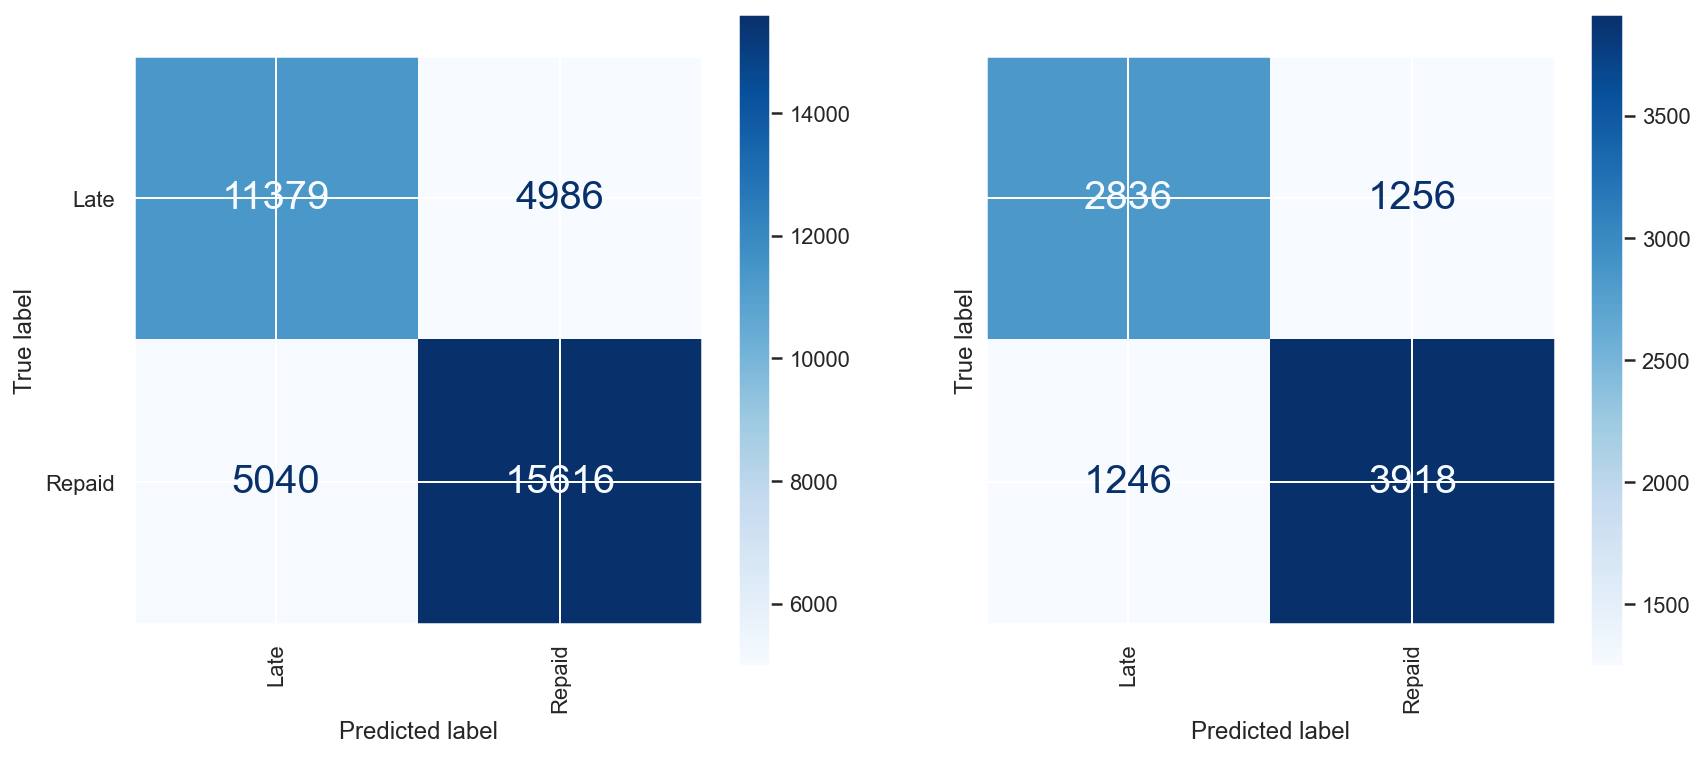

ROC Curves:


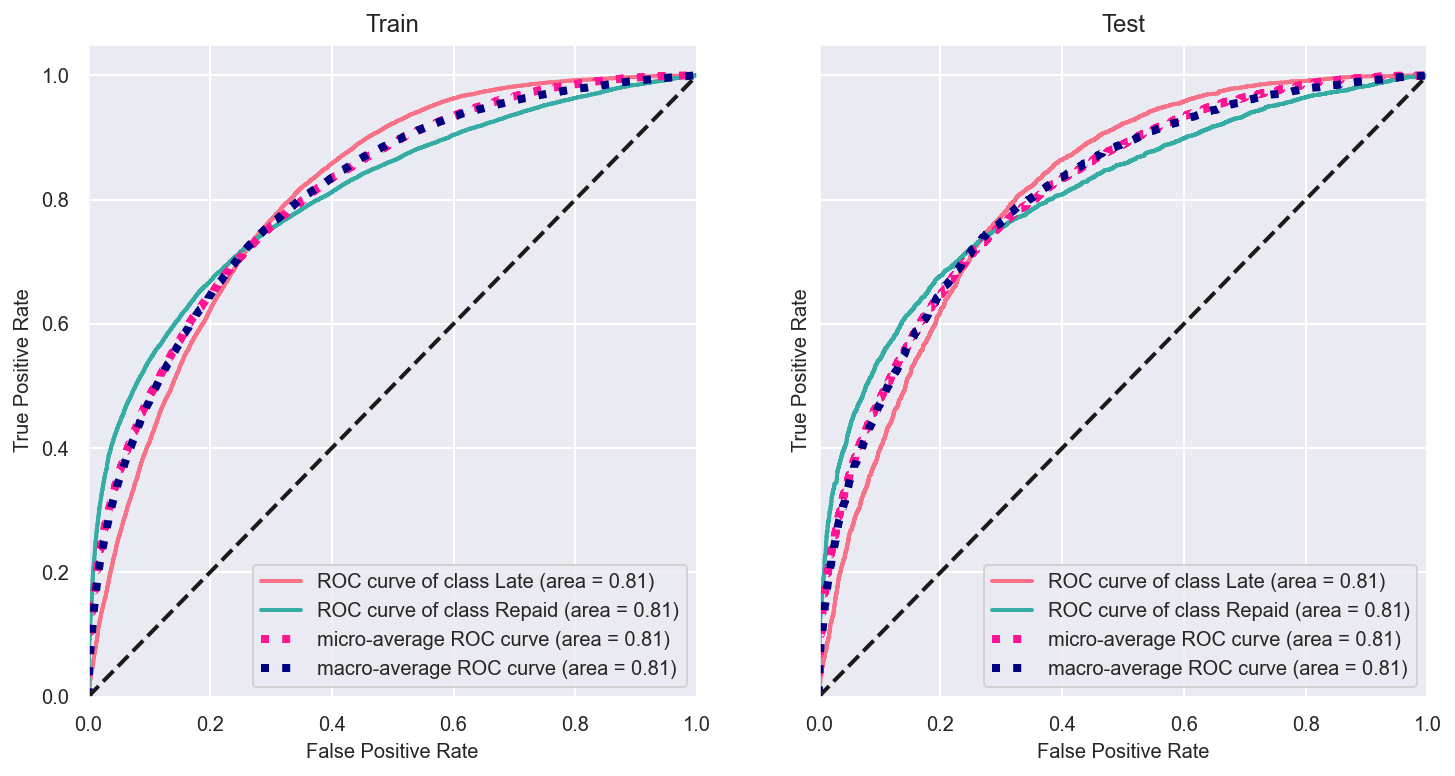

Precision Recall Curve:


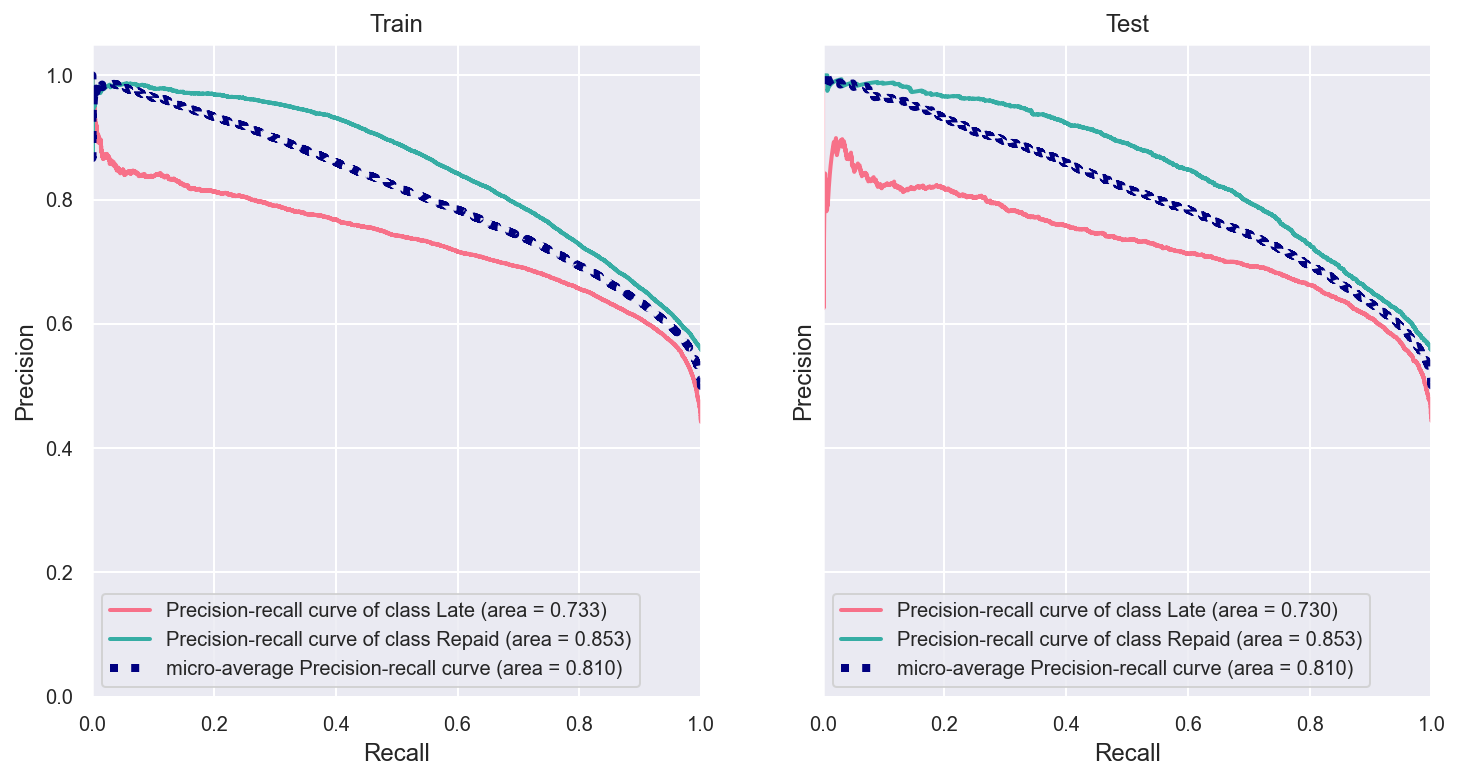

Threshold analysis:


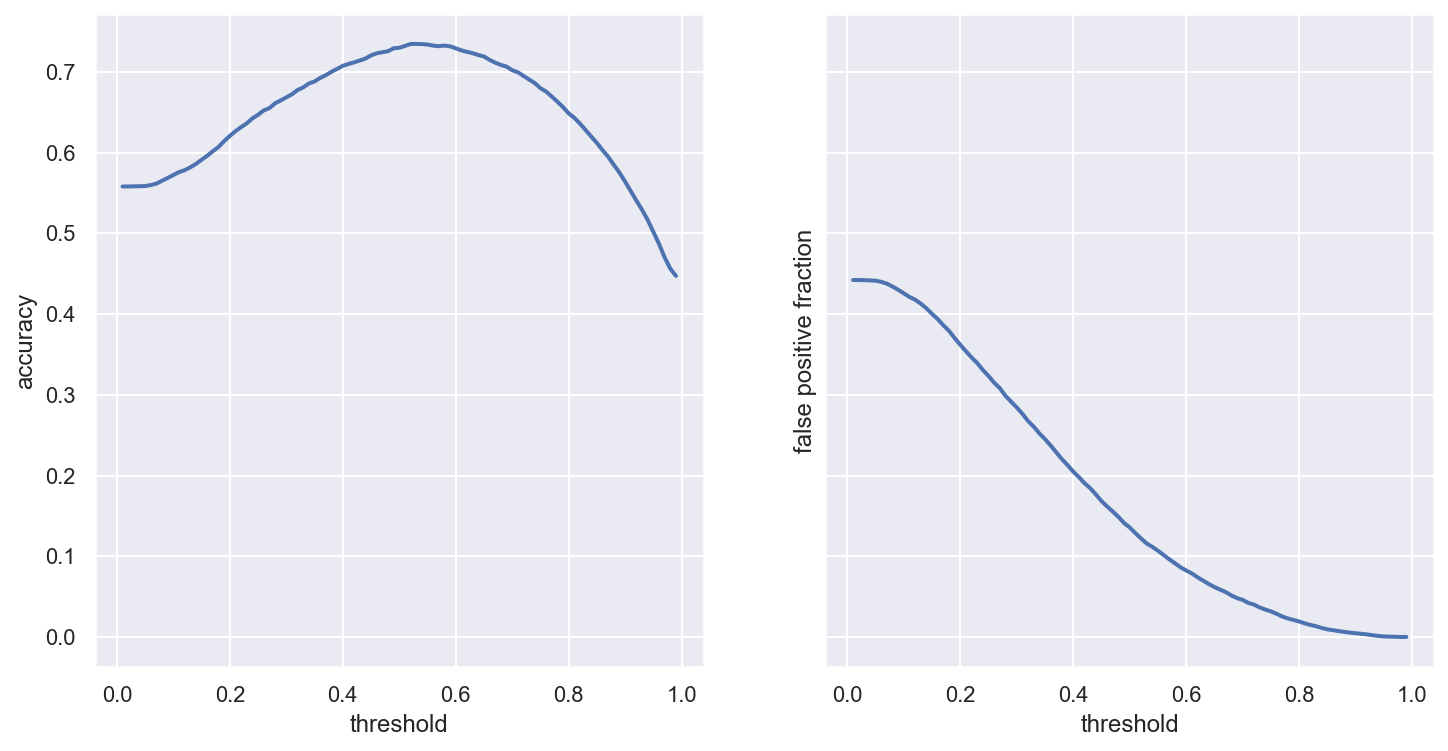

In [38]:
logist_plots(model=LRCV,
             X_train=X_train,
             y_train=y_train,
             X_test=X_test,
             y_test=y_test, CV_scores=LRCV_scores,
             yes_label='Late',no_label='Repaid')

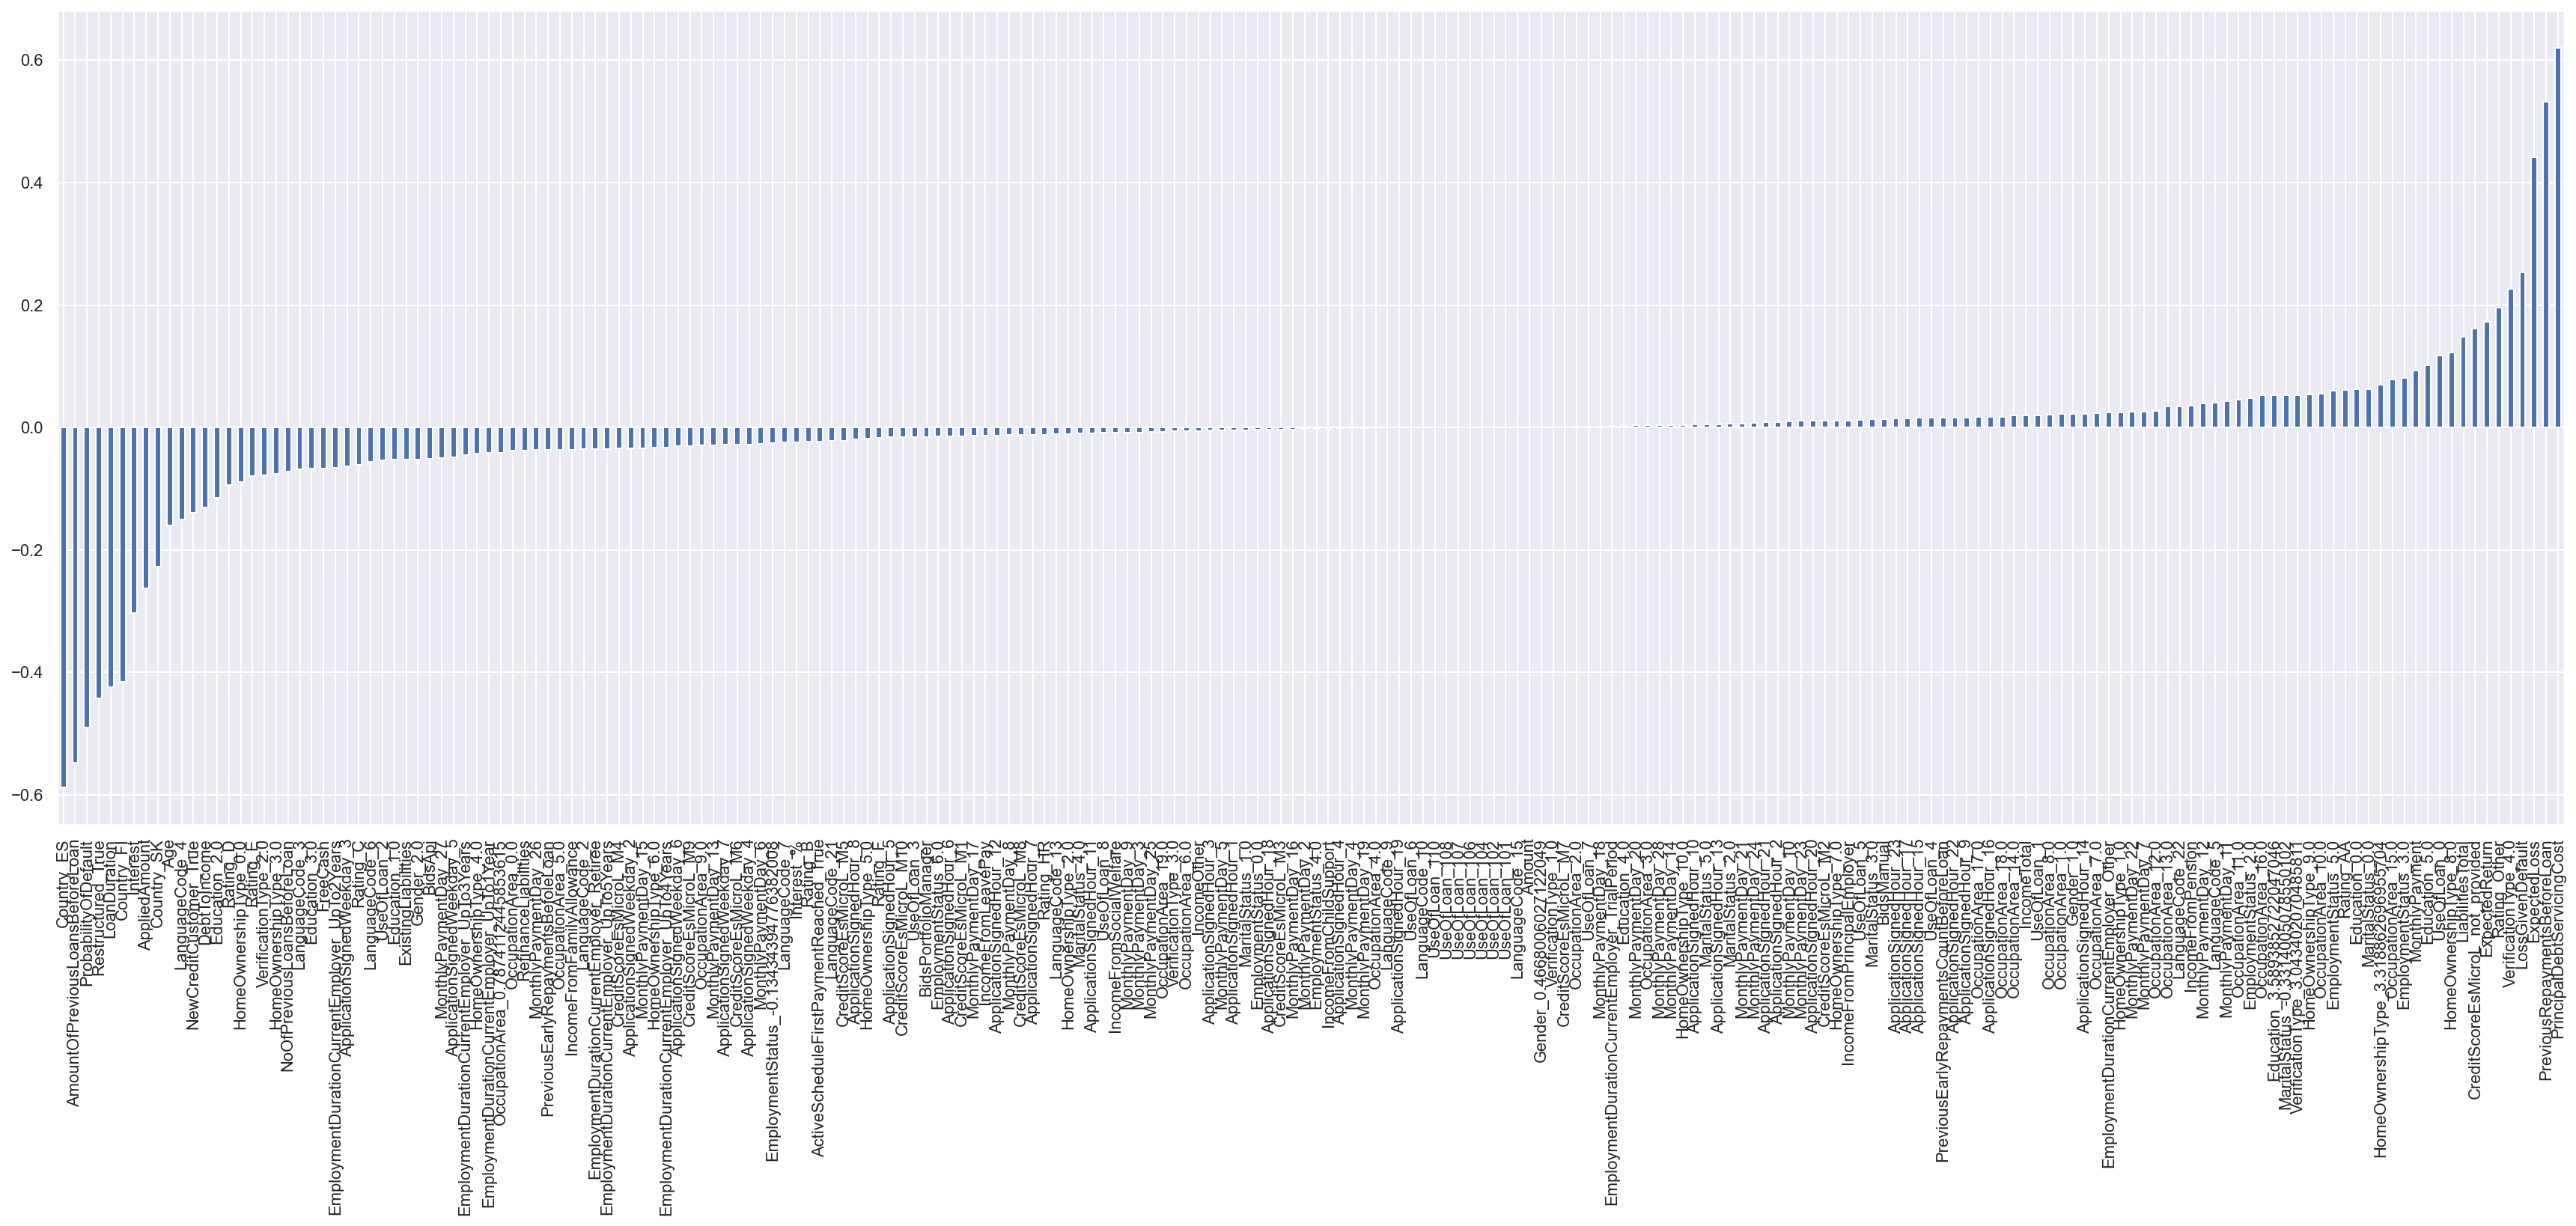

In [39]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(LRCV.coef_[0], index=X_train.columns,columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by='coef_abs', ascending = False)

# plot the magnitude of the coefficients (vertical)
fig, ax = plt.subplots(figsize=(30, 10))
df_coef['coefficients'].sort_values().plot(kind='bar')
plt.show()

In [41]:
## Show Model Output summary
models_summary = pd.DataFrame(index=['Training Score', 'Cross-Validation', 'Test Score', 'Best C', 'Best L1 Ratio','K-Folds'])
def model_summary_table(model,cv_scores,k_folds, X_train,model_name,create_table=False, models_summary=models_summary):
    
    try: C = np.round(model.C_[0],3)
    except: C= 'na'
    
    try: L1_ratio = np.round(model.l1_ratio_[0],3)
    except: L1_ratio = 'na'
        
    if create_table == True:
        models_summary = pd.DataFrame(index=['Training Score', 'Cross-Validation', 'Test Score', 'Best C', 'Best L1 Ratio','K-Folds'])
        model_summary = [np.round(model.score(X_train,y_train),3),np.round(cv_scores.mean(),3), np.round(model.score(X_test, y_test),3), C, L1_ratio, k_folds]
        models_summary[model_name] = model_summary

    else: 
        model_summary = [np.round(model.score(X_train,y_train),3),np.round(cv_scores.mean(),3), np.round(model.score(X_test, y_test),3), C, L1_ratio, k_folds]
        models_summary[model_name] = model_summary

    return models_summary


In [42]:
models_summary = model_summary_table(model=LRCV,cv_scores=LRCV_scores,k_folds=5, X_train=X_train,model_name='LRCV', create_table=True,models_summary=models_summary)
models_summary

,LRCV
Training Score,0.729
Cross-Validation,0.726
Test Score,0.730
Best C,0.268
Best L1 Ratio,0.700
K-Folds,5.000


### K-Nearest Neighbours (KNN)

### Decision Tree

Simple Decision Tree using max depth at 7

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=7, 
                                    random_state=1)

dtree_model.fit(X_train, y_train)


dtree_model_cv_scores = cross_val_score(dtree_model, X_train, y_train, cv=skf)

In [44]:
model_score(dtree_model,dtree_model_cv_scores)

Base line score: 0.558
Training Score: 0.724
Test Score: 0.716
Cross-validated training scores: [0.7164 0.7065 0.7026 0.7142 0.7246]
Mean cross-validated training score: 0.713 



y_train classification report:
              precision    recall  f1-score   support

        Late       0.69      0.69      0.69     16365
      Repaid       0.75      0.75      0.75     20656

    accuracy                           0.72     37021
   macro avg       0.72      0.72      0.72     37021
weighted avg       0.72      0.72      0.72     37021

y_test classification report:
              precision    recall  f1-score   support

        Late       0.67      0.69      0.68      4092
      Repaid       0.75      0.74      0.74      5164

    accuracy                           0.72      9256
   macro avg       0.71      0.71      0.71      9256
weighted avg       0.72      0.72      0.72      9256



/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


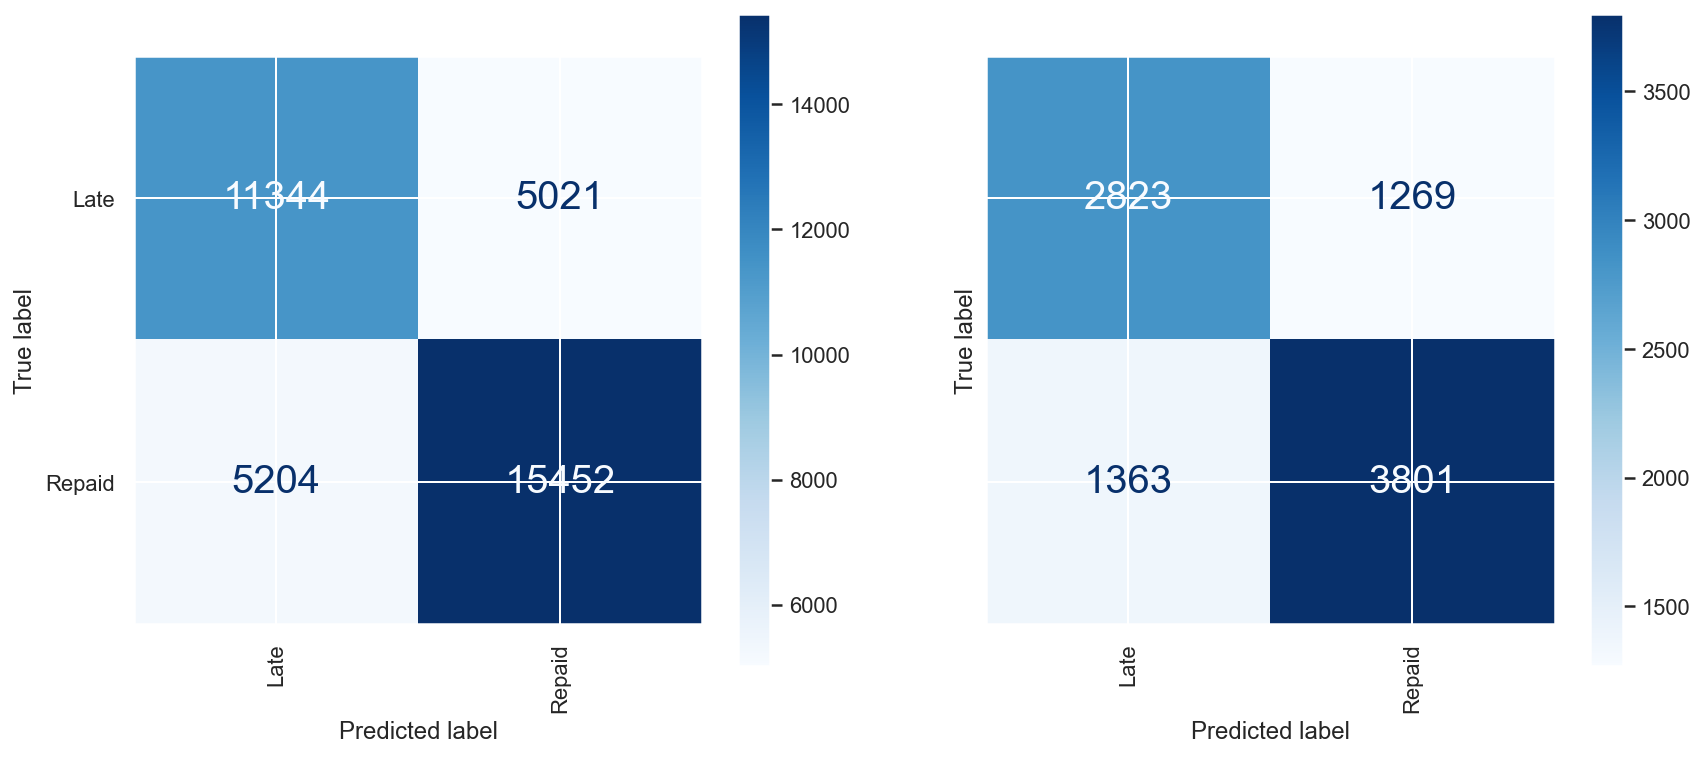

ROC Curves:


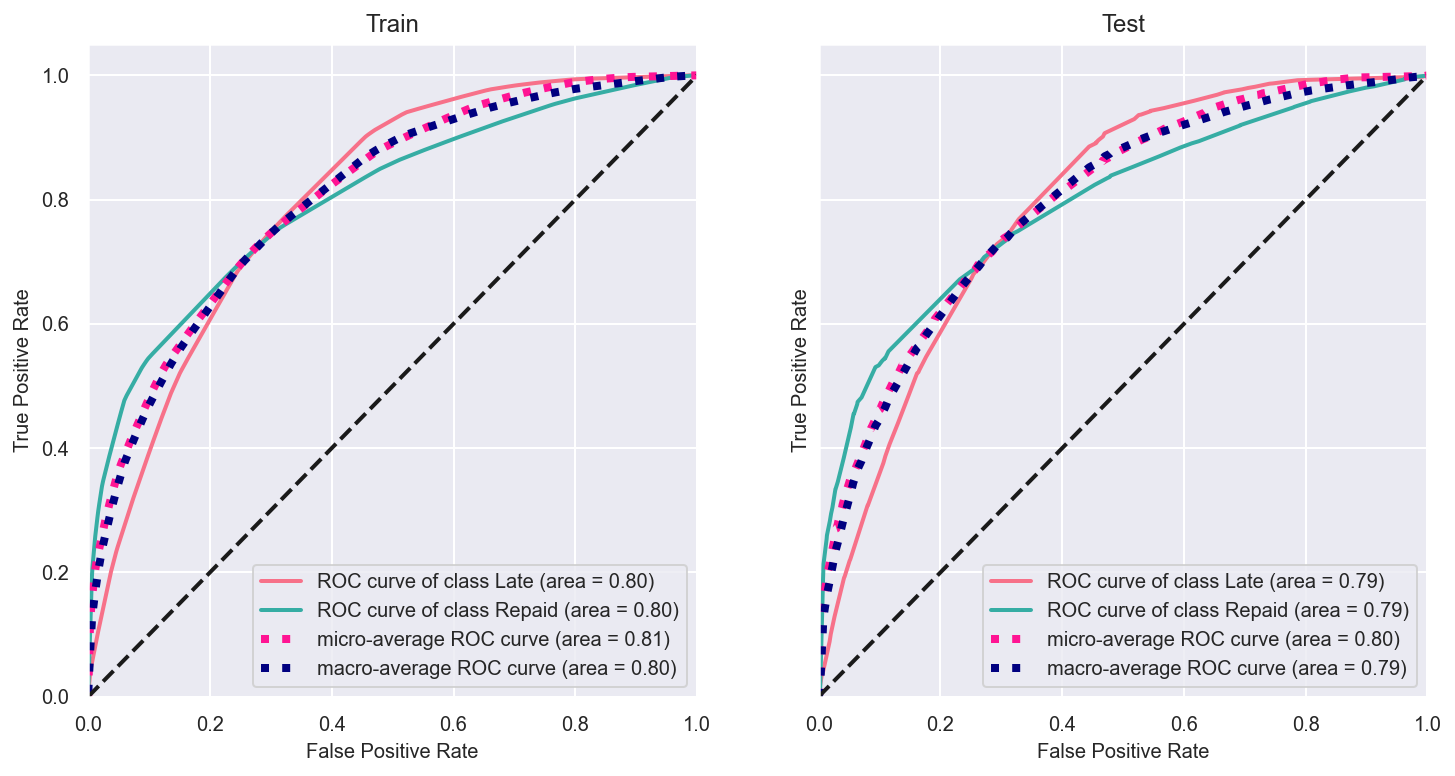

Precision Recall Curve:


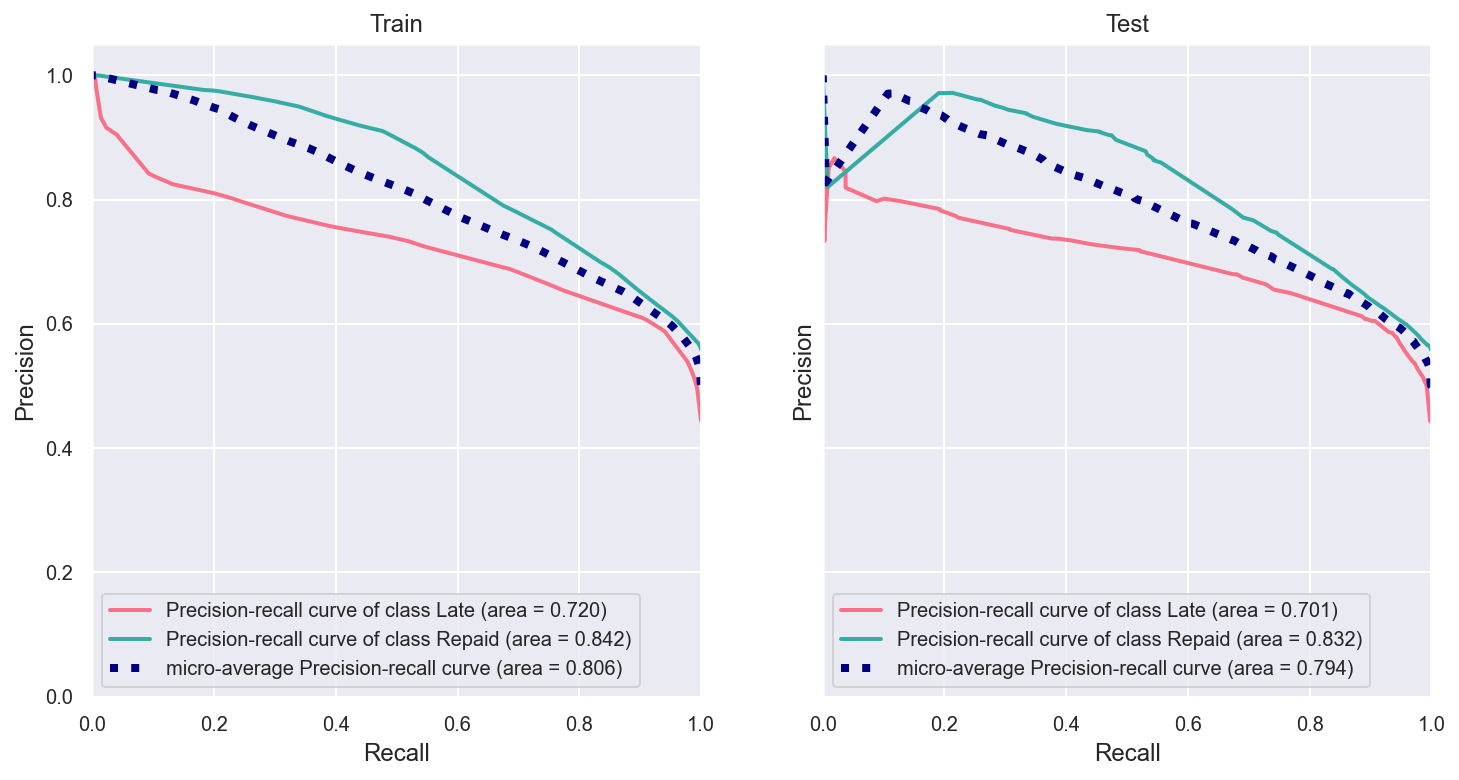

Threshold analysis:


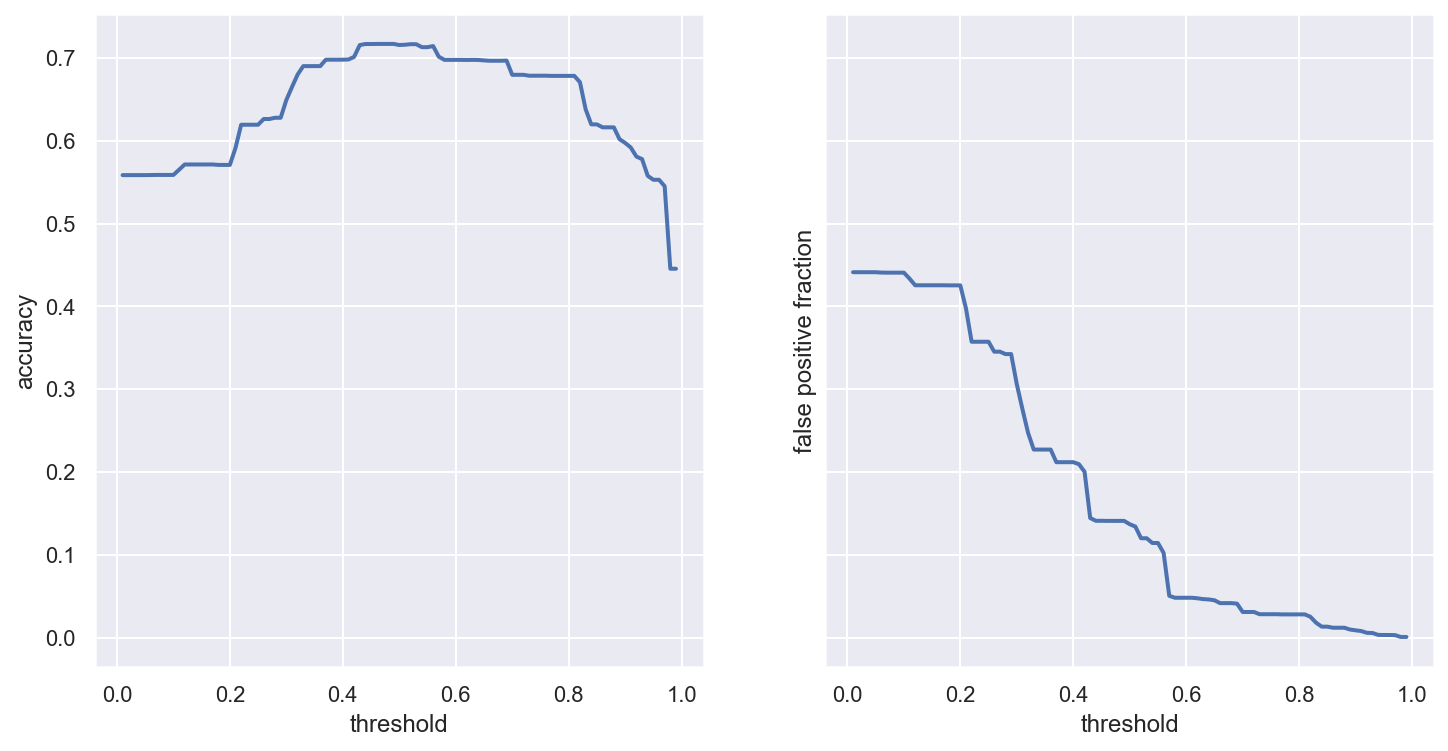

In [45]:
logist_plots(dtree_model,
             X_train=X_train,
             y_train=y_train,
             X_test=X_test,
             y_test=y_test,
             yes_label='Late',no_label='Repaid',CV_scores=dtree_model_cv_scores)

In [46]:
models_summary = model_summary_table(model=dtree_model,cv_scores=dtree_model_cv_scores,k_folds=5, X_train=X_train,model_name='dtree', create_table=False,models_summary=models_summary)
models_summary

,LRCV,dtree
Training Score,0.729,0.724
Cross-Validation,0.726,0.713
Test Score,0.730,0.716
Best C,0.268,na
Best L1 Ratio,0.700,na
K-Folds,5.000,5


Decision Tree using gid search

In [47]:
from sklearn.model_selection import GridSearchCV

# gridsearch params
dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}

# set the gridsearch
model = DecisionTreeClassifier()
dtc_gs = GridSearchCV(model, dtc_params, cv=skf, verbose=1, n_jobs=-1)

In [48]:
# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
{'max_depth': 8, 'min_samples_split': 30}
0.7163230999831834


In [49]:
# Get cross validation training scores
dtc_cvscores = cross_val_score(dtc_best, X_train, y_train, cv=skf, n_jobs=6)

In [50]:
model_score(dtc_best,dtc_cvscores)

Base line score: 0.558
Training Score: 0.733
Test Score: 0.719
Cross-validated training scores: [0.7192 0.7133 0.7084 0.7152 0.7258]
Mean cross-validated training score: 0.716 



y_train classification report:
              precision    recall  f1-score   support

        Late       0.69      0.73      0.71     16365
      Repaid       0.78      0.73      0.75     20656

    accuracy                           0.73     37021
   macro avg       0.73      0.73      0.73     37021
weighted avg       0.74      0.73      0.73     37021

y_test classification report:
              precision    recall  f1-score   support

        Late       0.67      0.72      0.69      4092
      Repaid       0.76      0.72      0.74      5164

    accuracy                           0.72      9256
   macro avg       0.72      0.72      0.72      9256
weighted avg       0.72      0.72      0.72      9256



/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


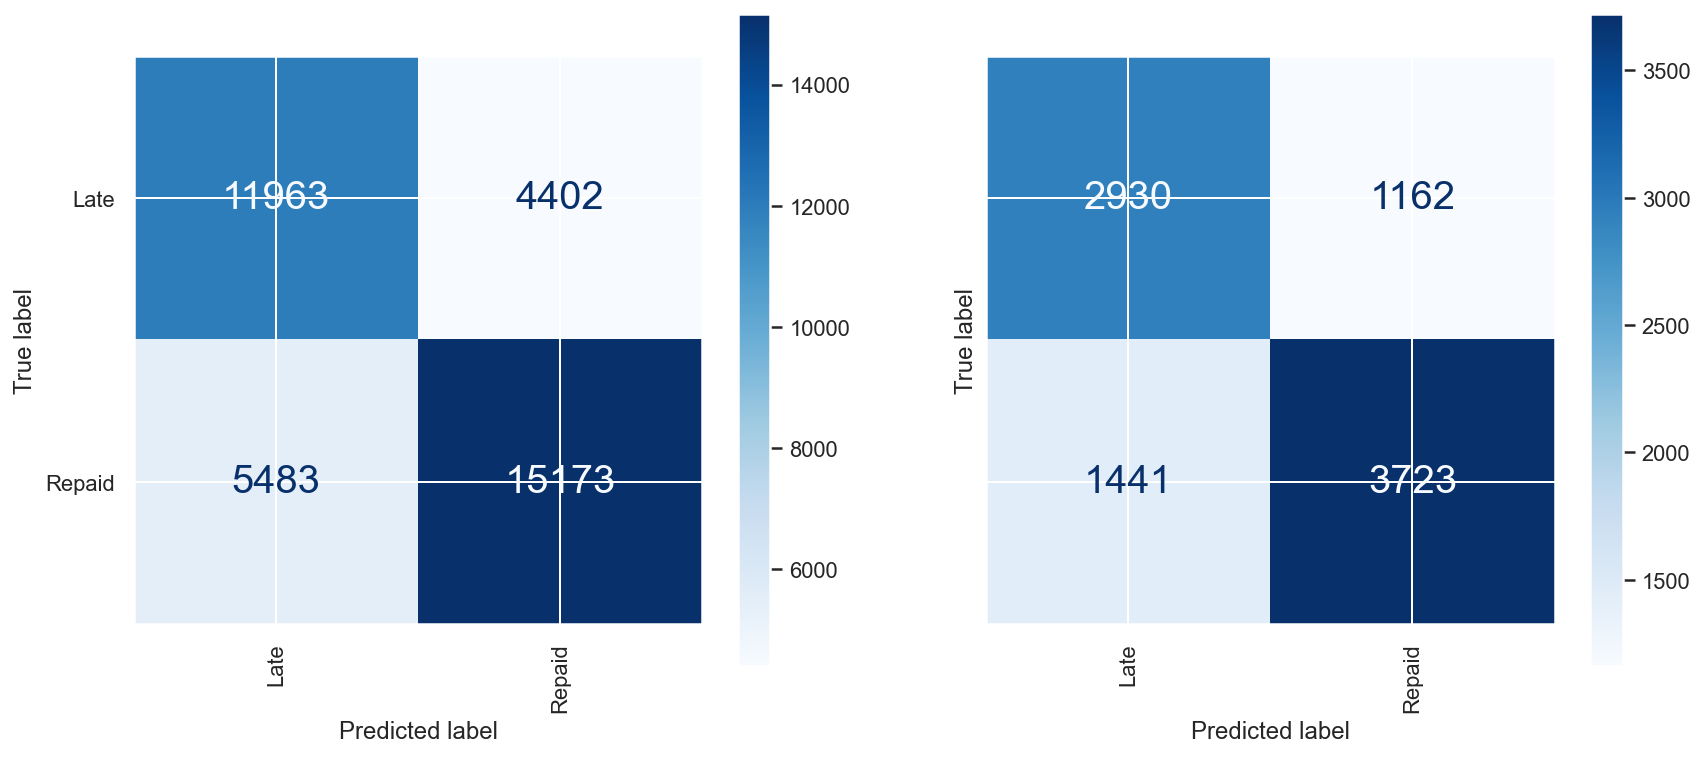

ROC Curves:


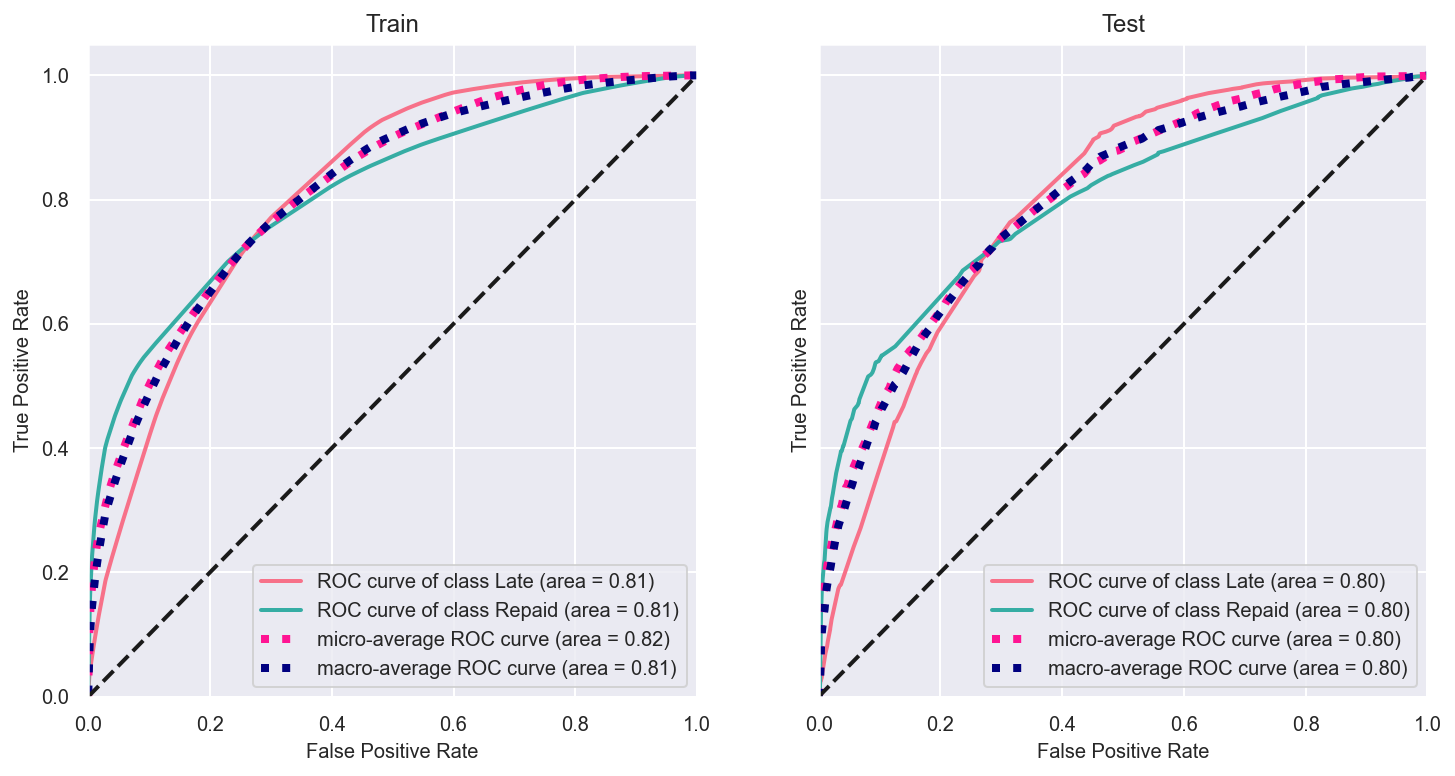

Precision Recall Curve:


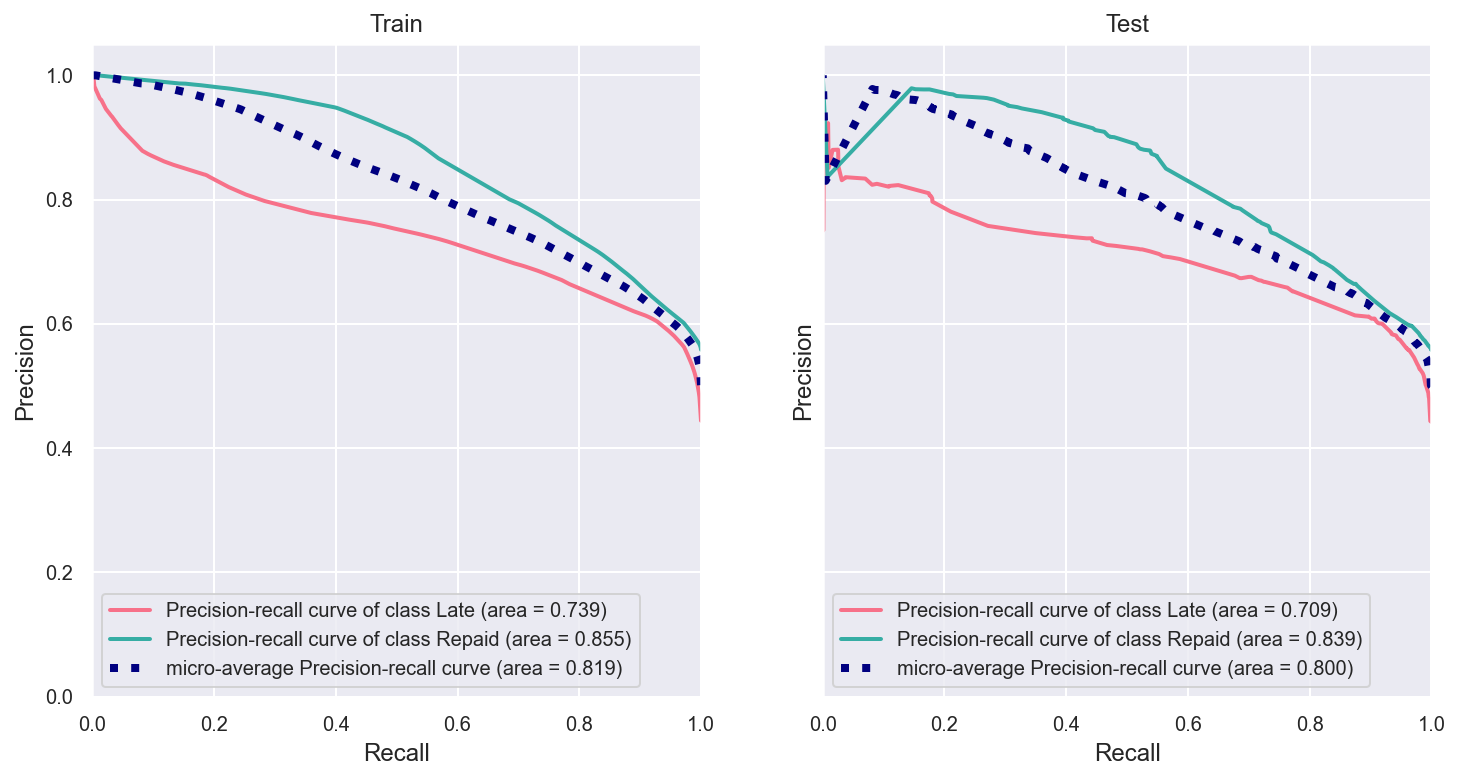

Threshold analysis:


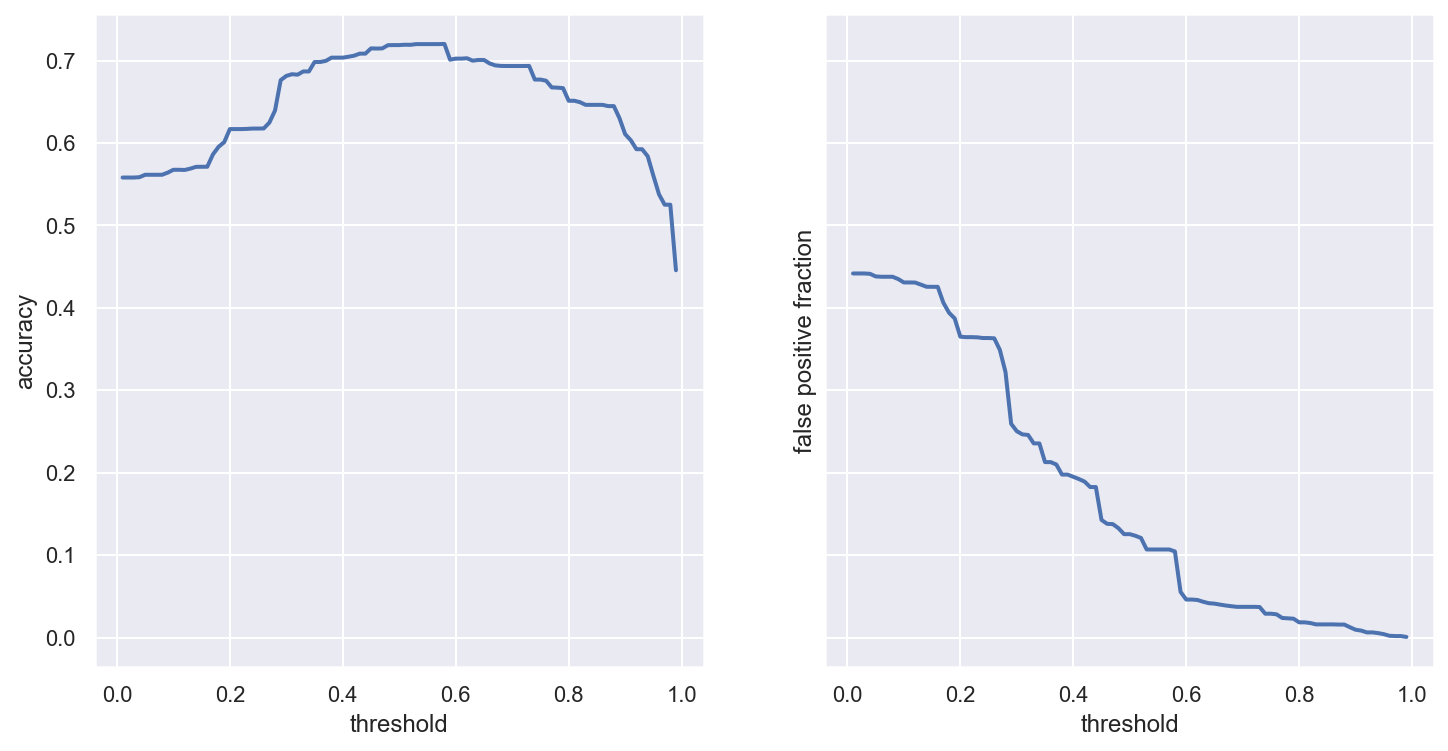

In [51]:
logist_plots(dtc_best,
             X_train=X_train,
             y_train=y_train,
             X_test=X_test,
             y_test=y_test,
             yes_label='Late',no_label='Repaid',CV_scores=dtc_cvscores)

In [52]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtc_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
23,LossGivenDefault,0.331606
7,LoanDuration,0.195341
200,Restructured_True,0.120435
8,MonthlyPayment,0.080474
25,ProbabilityOfDefault,0.067022
...,...,...
93,UseOfLoan_7,0.000000
94,UseOfLoan_8,0.000000
95,UseOfLoan_101,0.000000
96,UseOfLoan_102,0.000000


Ranks features in order of importance. Scores of all features add up to 1.

The score takes into account how many times the feature was used to make a decision, how many data points were involved in each decision and how much the decision increased the purity of the node. A feature with higher feature importance reduced the criterion (impurity) more than the other features.

In [53]:
models_summary = model_summary_table(model=dtc_best,cv_scores=dtc_cvscores,k_folds=5, X_train=X_train,model_name='dtree_grid', create_table=False,models_summary=models_summary)
models_summary

,LRCV,dtree,dtree_grid
Training Score,0.729,0.724,0.733
Cross-Validation,0.726,0.713,0.716
Test Score,0.730,0.716,0.719
Best C,0.268,na,na
Best L1 Ratio,0.700,na,na
K-Folds,5.000,5,5


### Bagging Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
base_estimator = dtc_best
bagging = BaggingClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
bagging.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_split=30),
                  n_estimators=100, random_state=1)

In [55]:
bagging_cv_scores = cross_val_score(bagging, X_train, y_train, cv=skf)

In [56]:
print(bagging.score(X_train, y_train))
print(bagging_cv_scores.mean())
print(bagging.score(X_test, y_test))

0.7522757353934254
0.7295317347667976
0.7318496110630942


In [57]:
models_summary = model_summary_table(model=bagging,cv_scores=bagging_cv_scores,k_folds=5, X_train=X_train,model_name='bagging', create_table=False,models_summary=models_summary)
models_summary

,LRCV,dtree,dtree_grid,bagging
Training Score,0.729,0.724,0.733,0.752
Cross-Validation,0.726,0.713,0.716,0.73
Test Score,0.730,0.716,0.719,0.732
Best C,0.268,na,na,na
Best L1 Ratio,0.700,na,na,na
K-Folds,5.000,5,5,5


### Random Forest

In [58]:
random_forest = RandomForestClassifier(
                           n_estimators=100,
                           random_state=1)
random_forest.fit(X_train, y_train)



RandomForestClassifier(random_state=1)

In [59]:
random_forest_scores = cross_val_score(bagging, X_train, y_train, cv=skf)

In [61]:
print(random_forest.score(X_train, y_train))
print(random_forest_scores.mean())
print(random_forest.score(X_test, y_test))

1.0
0.7295317347667976
0.7460025929127053


In [62]:
models_summary = model_summary_table(model=random_forest,cv_scores=random_forest_scores,k_folds=5, X_train=X_train,model_name='random_forest', create_table=False,models_summary=models_summary)
models_summary

,LRCV,dtree,dtree_grid,bagging,random_forest
Training Score,0.729,0.724,0.733,0.752,1.0
Cross-Validation,0.726,0.713,0.716,0.73,0.73
Test Score,0.730,0.716,0.719,0.732,0.746
Best C,0.268,na,na,na,na
Best L1 Ratio,0.700,na,na,na,na
K-Folds,5.000,5,5,5,5


### ADA Boost: Decision Tree

In [65]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = dtc_best
boost_model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
boost_model.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_samples_split=30),
                   n_estimators=100, random_state=1)

In [66]:
boost_scores = cross_val_score(boost_model, X_train, y_train, cv=skf)

In [68]:
print(boost_model.score(X_train, y_train))
print(cross_val_score(boost_model, X_train, y_train, cv=skf).mean())
print(boost_model.score(X_test, y_test))

0.9999459766078712
0.6899055385869127
0.692199654278306


In [69]:
models_summary = model_summary_table(model=boost_model,cv_scores=boost_scores,k_folds=5, X_train=X_train,model_name='ADA_Boost', create_table=False,models_summary=models_summary)
models_summary

,LRCV,dtree,dtree_grid,bagging,random_forest,ADA_Boost
Training Score,0.729,0.724,0.733,0.752,1.0,1.0
Cross-Validation,0.726,0.713,0.716,0.73,0.73,0.69
Test Score,0.730,0.716,0.719,0.732,0.746,0.692
Best C,0.268,na,na,na,na,na
Best L1 Ratio,0.700,na,na,na,na,na
K-Folds,5.000,5,5,5,5,5


### ADA Boost: Elastic Net

In [71]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = lr_model
boost_model_lrcv = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
boost_model_lrcv.fit(X_train, y_train)


/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(C=0.2682695795279725,
                                                     l1_ratio=0.7),
                   n_estimators=100, random_state=1)

In [72]:
boostlrcv_scores = cross_val_score(boost_model_lrcv, X_train, y_train, cv=skf)

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/stuart/Desktop/Data_Projects/Bondora_Defaults/env_Bondora_Defaults/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.wa

In [73]:
print(boost_model_lrcv.score(X_train, y_train))
print(boostlrcv_scores.mean())
print(boost_model_lrcv.score(X_test, y_test))

0.7254261095054159
0.720861089011141
0.726447709593777


In [74]:
models_summary = model_summary_table(model=boost_model_lrcv,cv_scores=boostlrcv_scores,k_folds=5, X_train=X_train,model_name='ADA_Boost_lgcv', create_table=False,models_summary=models_summary)
models_summary

,LRCV,dtree,dtree_grid,bagging,random_forest,ADA_Boost,ADA_Boost_lgcv
Training Score,0.729,0.724,0.733,0.752,1.0,1.0,0.725
Cross-Validation,0.726,0.713,0.716,0.73,0.73,0.69,0.721
Test Score,0.730,0.716,0.719,0.732,0.746,0.692,0.726
Best C,0.268,na,na,na,na,na,na
Best L1 Ratio,0.700,na,na,na,na,na,na
K-Folds,5.000,5,5,5,5,5,5


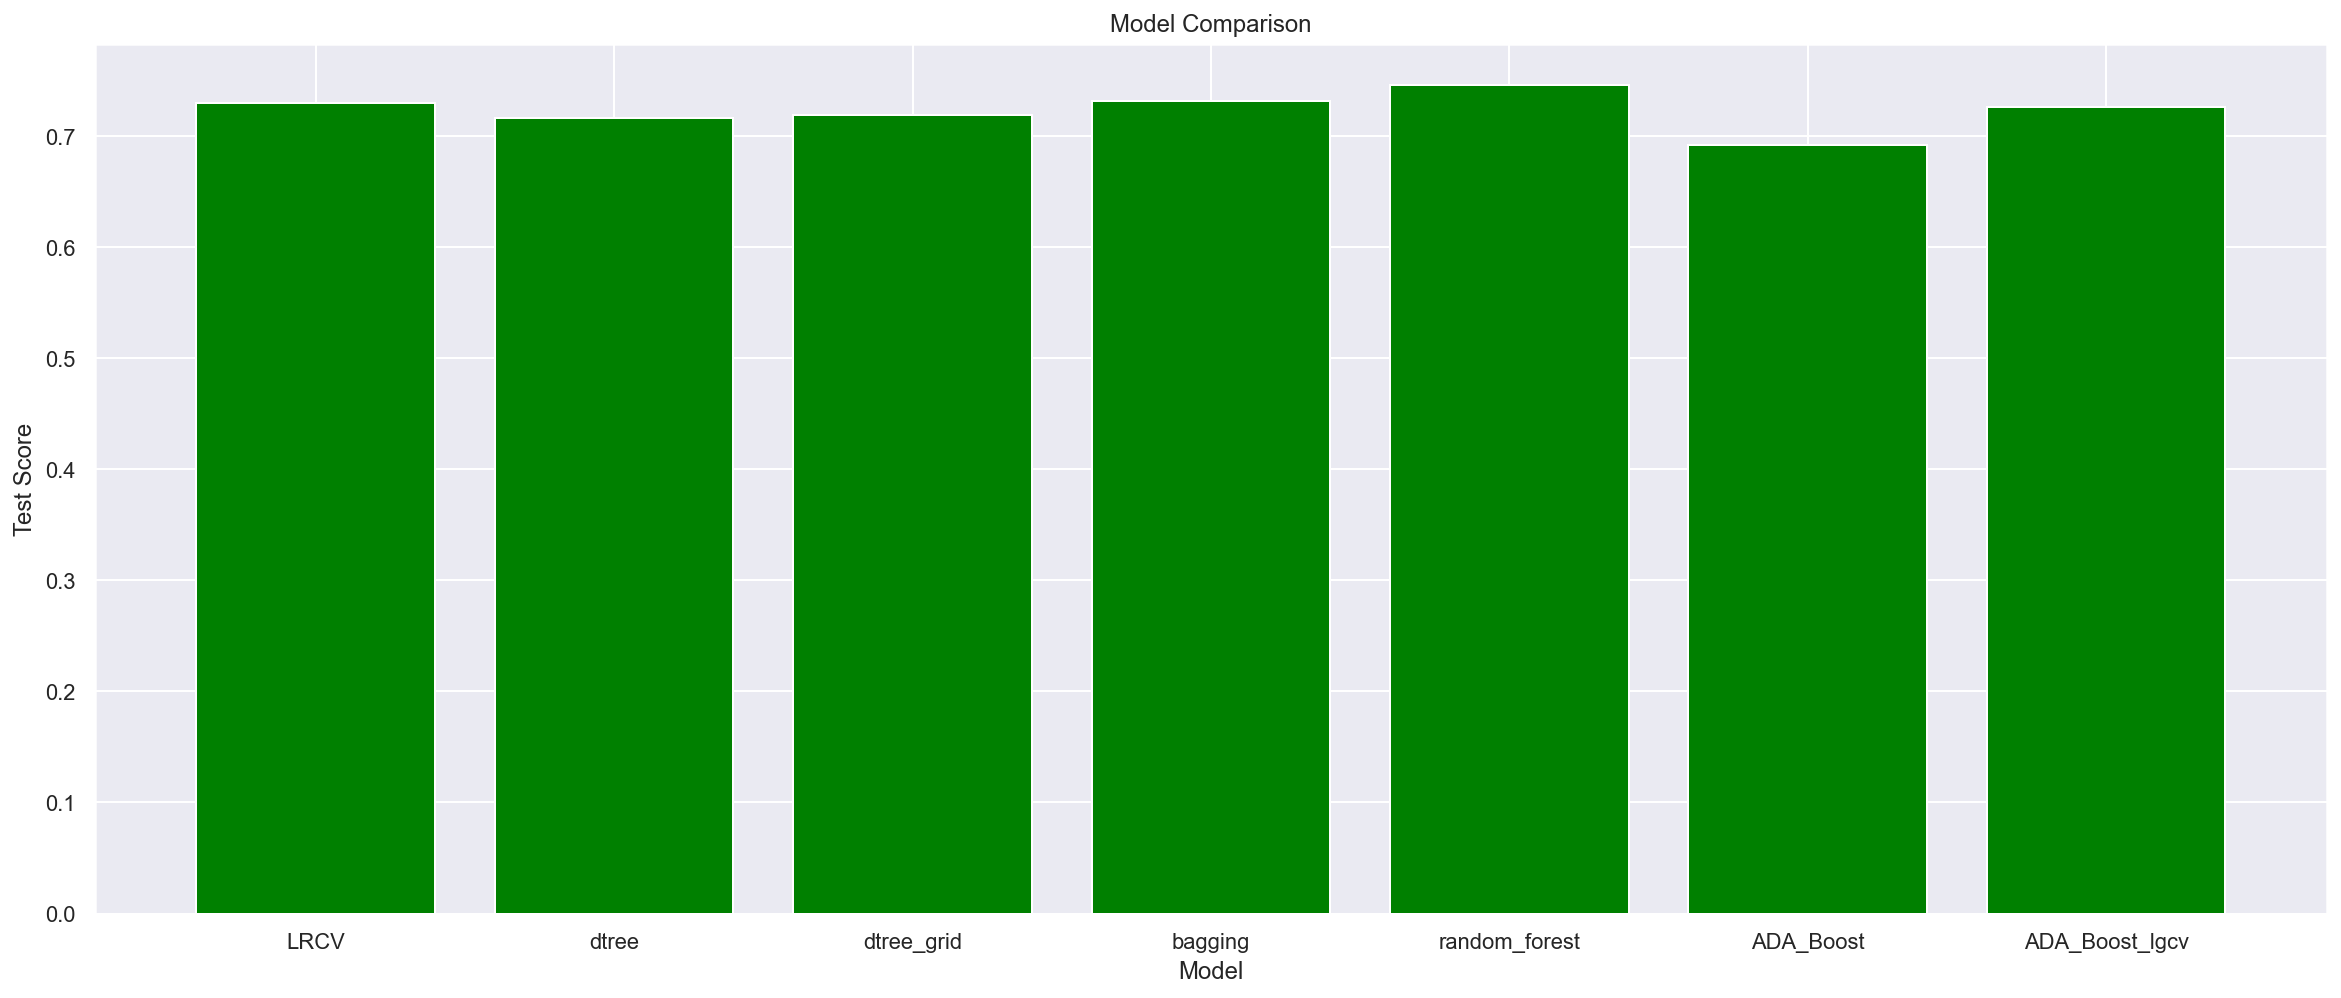

In [86]:
fig1, ax1 = plt.subplots(ncols=1,nrows=1, figsize=(20, 8))
x = models_summary.columns
y = models_summary.loc['Test Score']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='green')
plt.xlabel("Model")
plt.ylabel("Test Score")
plt.title("Model Comparison",)

plt.xticks(x_pos, x)
plt.show()
